In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import seaborn as sns
import pandas as pd
import time
import random
import pickle
import time
import itertools
from scipy.stats import pearsonr
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length
from scipy.stats import pearsonr,spearmanr
from statistics import stdev, variance 
import pyphi
import japanize_matplotlib

%matplotlib inline


Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'



In [2]:
df = pd.DataFrame()

#3
#nodes = ('A', 'B', 'C')
#4
#nodes = ('A', 'B', 'C', 'D')
#5
nodes = ['A', 'B', 'C', 'D', 'E']
#6
#nodes = ['A', 'B', 'C', 'D', 'E', 'F']
#7
#nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
#8
#nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
#9
#nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
#10
#nodes = ['A', 'B', 'C', 'D', 'E', 'F','G', 'H', 'I', 'J']
#11
#nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K']
n = len(nodes)
networks = 30

# データ読み込み

In [31]:
cm_path = "./cm/{0}_nodes_cm.npy".format(len(nodes))
edge_path = "./edge/{0}_nodes_edge.json".format(len(nodes))
cm_list = np.load(cm_path)
with open(edge_path, 'rb') as fp:
    edges = pickle.load(fp)

In [32]:
phis_path = "./phi/{0}_nodes_phis.json".format(len(nodes))
success_state_path = "./success_states/{0}_nodes_success_state.json".format(len(nodes))

#with open(success_state_path, 'rb') as fp:
    #success_state = pickle.load(fp)
with open(phis_path, 'rb') as fp:
    phis = pickle.load(fp)

In [36]:
phis.update(phis2)

# plot

In [38]:
max_phi_list = []
ave_phi_list = []
for i in range(30):
    max_phi_list.append(max(phis[i]))
    ave_phi_list.append(sum(phis[i]) / len(phis[i]))

## max

In [56]:
degree_centers_nodes = []
close_centers_nodes = []
degrees_nodes = []
between_centers_nodes = []
eigen_centers_nodes = []
cluster_nodes = []
short_path_length_nodes = []

degree_centers_std = []
degree_centers_variance = []

num_edges = []

In [57]:
max_degree_centers= []
max_close_centers= []
max_degrees= []
max_between_centers= [] 
max_eigen_centers= []
max_cluster = []

sum_between_centers = []
sum_degree_centers = []
sum_close_centers = []
sum_degrees = []
sum_eigen_centers = []
sum_cluster = []

mean_cluster = []
mean_short_path_length = []

In [58]:
for i in range(30):
    #cm, edges = make_cm_edges(nodes, 30)
    cm = np.load(cm_path)
    with open(edge_path, 'rb') as fp:
        edges = pickle.load(fp)
    
    
    
    # 有向グラフを作成する。
    G = nx.DiGraph()
    # ノード一覧を追加する。
    G.add_nodes_from(nodes)
    # エッジ一覧を追加する。
    G.add_edges_from(edges[i])
    
    degrees = dict(nx.degree(G))
    degree_centers = nx.degree_centrality(G)
    close_centers = nx.closeness_centrality(G)
    between_centers = nx.betweenness_centrality(G)
    eigen_centers = nx.eigenvector_centrality_numpy(G)
    cluster = nx.clustering(G)
    mean_c = nx.algorithms.cluster.average_clustering(G)
    mean_l = average_shortest_path_length(G)
    mean_cluster.append(mean_c)
    mean_short_path_length.append(mean_l)
    dc_std = stdev(list(degree_centers.values()))
    dc_var = variance(list(degree_centers.values()))
    
   
    sum_between_centers.append(sum(between_centers.values()))
    sum_degree_centers.append(sum(degree_centers.values()))
    sum_close_centers.append(sum(close_centers.values()))
    sum_degrees.append(sum(degrees.values()))
    sum_eigen_centers.append(sum(eigen_centers.values()))
    sum_cluster.append(sum(cluster.values()))

    #max_degrees.append(degrees[max(degrees)])
    #max_degree_centers.append(degree_centers[max(degree_centers)])
    #max_close_centers.append(close_centers[max(close_centers)])
    #max_degrees.append(degrees[max(degrees)])
    #max_eigen_centers.append(eigen_centers[max(eigen_centers)])
    #max_between_centers.append(between_centers[max(between_centers)])
    #max_cluster.append(cluster[max(cluster)])
    
    max_degrees.append(max(degrees.values()))
    max_degree_centers.append(max(degree_centers.values()))
    max_close_centers.append(max(close_centers.values()))
    max_eigen_centers.append(max(eigen_centers.values()))
    max_between_centers.append(max(between_centers.values()))
    max_cluster.append(max(cluster.values()))
    
    degree_centers_std.append(dc_std)
    degree_centers_variance.append(dc_var)
    
    num_edges.append(len(edges[i]))

In [63]:
max_dic = {"phi":ave_phi_list,"degrees":max_degrees, "degree_centers":max_degree_centers, "close_centers":max_close_centers, "degrees":max_degrees, "eigen_centers":max_eigen_centers,"between_centers":max_between_centers, "cluster":max_cluster,"dc_std":degree_centers_std,"dc_var":degree_centers_variance}

In [64]:
max_df = pd.DataFrame(max_dic)

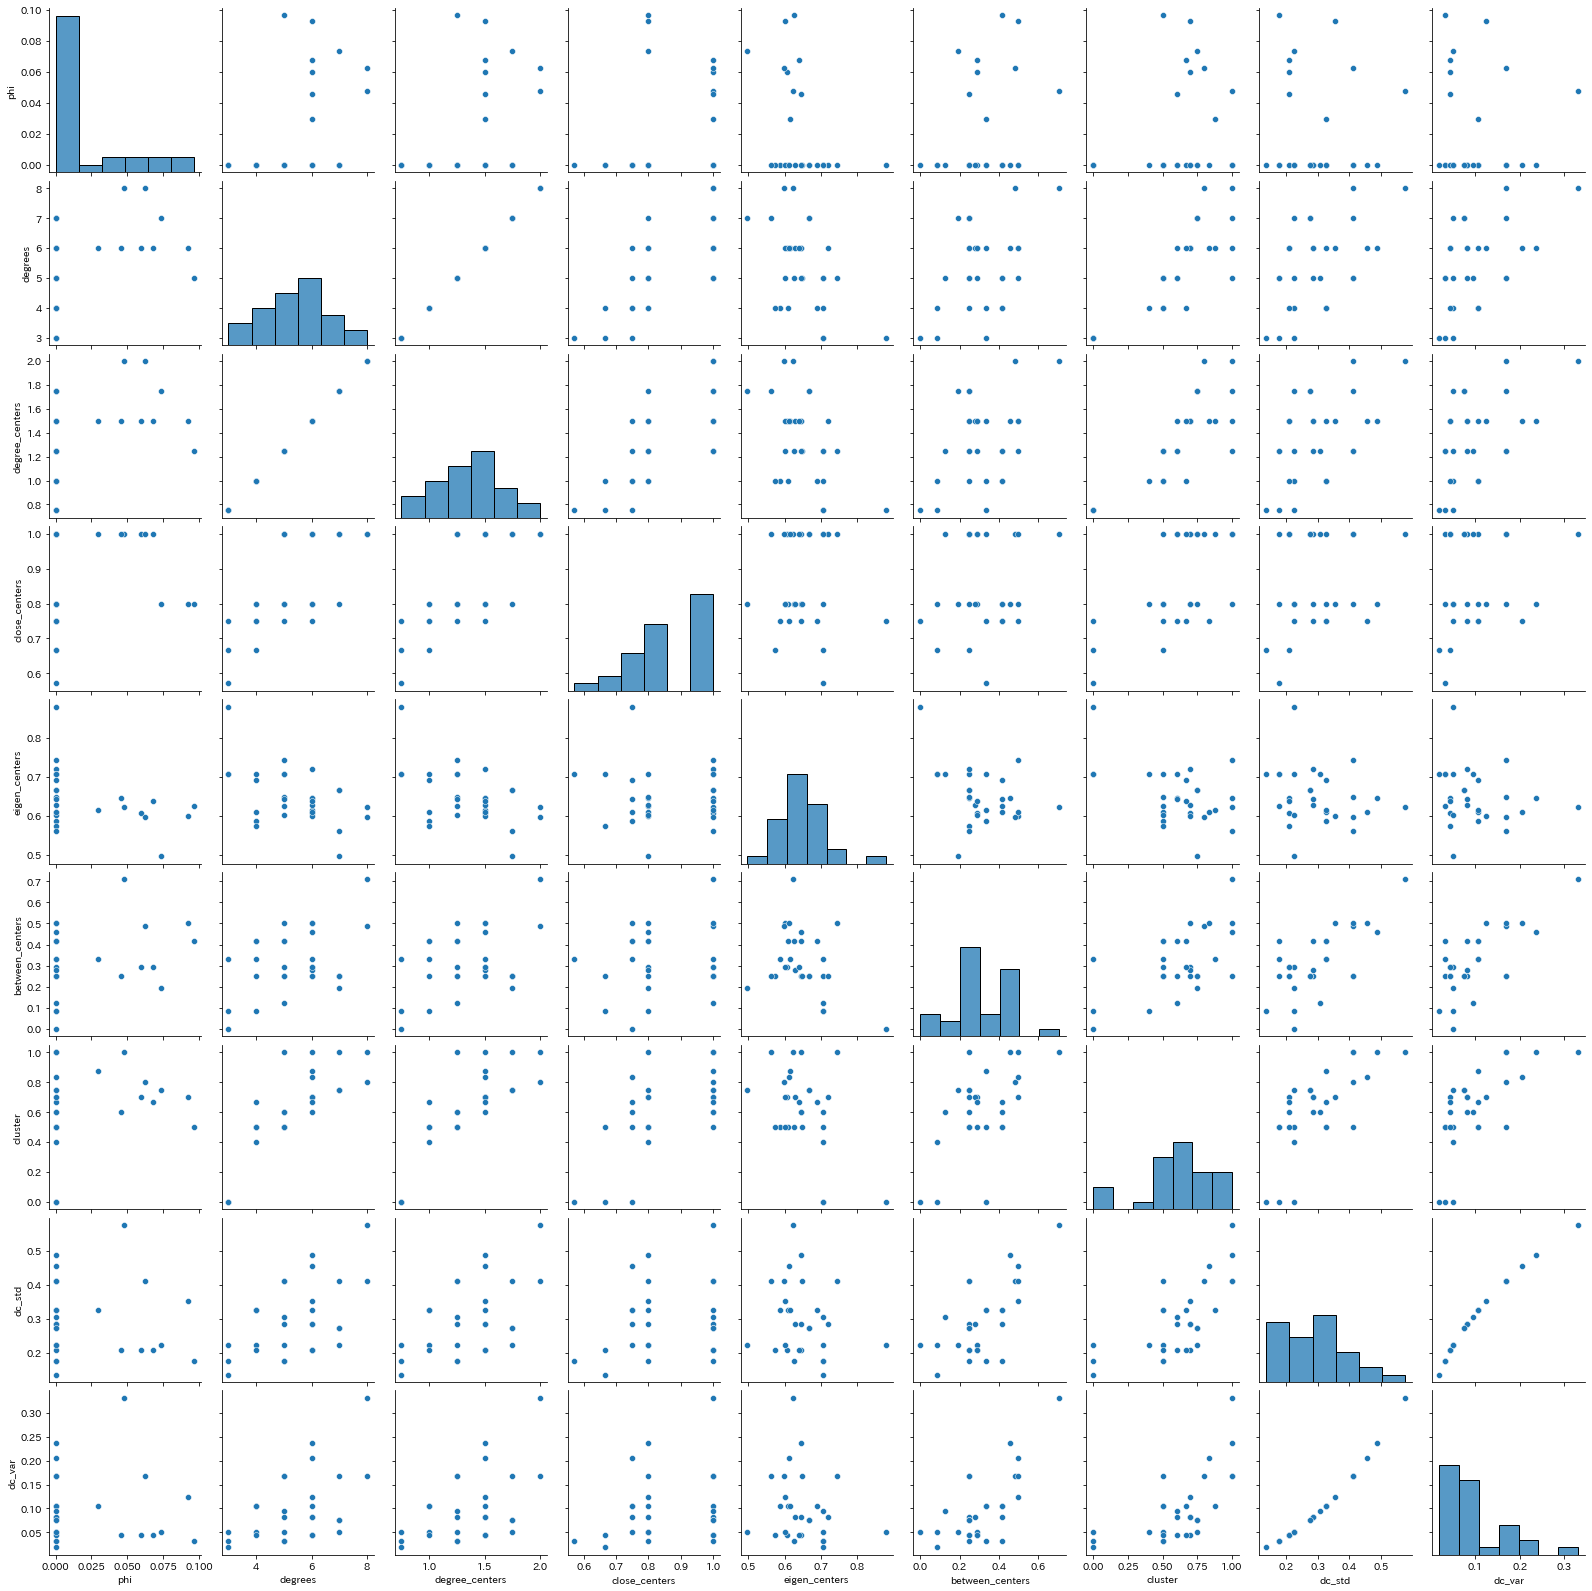

In [65]:
sns.pairplot(max_df)

In [11]:
c_list = ["degree_centers", "close_centers","degrees", "eigen_centers","between_centers","cluster","dc_var"]

In [12]:
for i in c_list:
  k, l = pearsonr(max_df["phi"].values, max_df[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.3524801302843081
degree_centers_p: 0.05608121281475693
close_centers_r: -0.008494248727526493
close_centers_p: 0.9644670330181808
degrees_r: 0.35248013028430814
degrees_p: 0.05608121281475693
eigen_centers_r: -0.6594187824453328
eigen_centers_p: 7.388977649364577e-05
between_centers_r: -0.35814573275800954
between_centers_p: 0.05197934129507465
cluster_r: 0.007984167338739322
cluster_p: 0.9665995787291511
dc_var_r: -0.29598115501816397
dc_var_p: 0.11226640151464387


## mean

In [32]:
mean_between_centers = [x/n for x in sum_between_centers]
mean_degree_centers = [x/n for x in sum_degree_centers]
mean_close_centers = [x/n for x in sum_close_centers]
mean_degrees = [x/n for x in sum_degrees]
mean_eigen_centers = [x/n for x in sum_eigen_centers]
mean_cluster = [x/n for x in sum_cluster]

In [33]:
mean_dic = {"phi":phis_list,"num_edge":num_edges,"mean_degrees":mean_degrees, "degree_centers":mean_degree_centers, "close_centers":mean_close_centers, "degrees":mean_degrees, "eigen_centers":mean_eigen_centers,"between_centers":mean_between_centers,"cluster":mean_cluster,"dc_std":degree_centers_std,"dc_var":degree_centers_variance,"L":mean_short_path_length}
mean_df = pd.DataFrame(mean_dic)

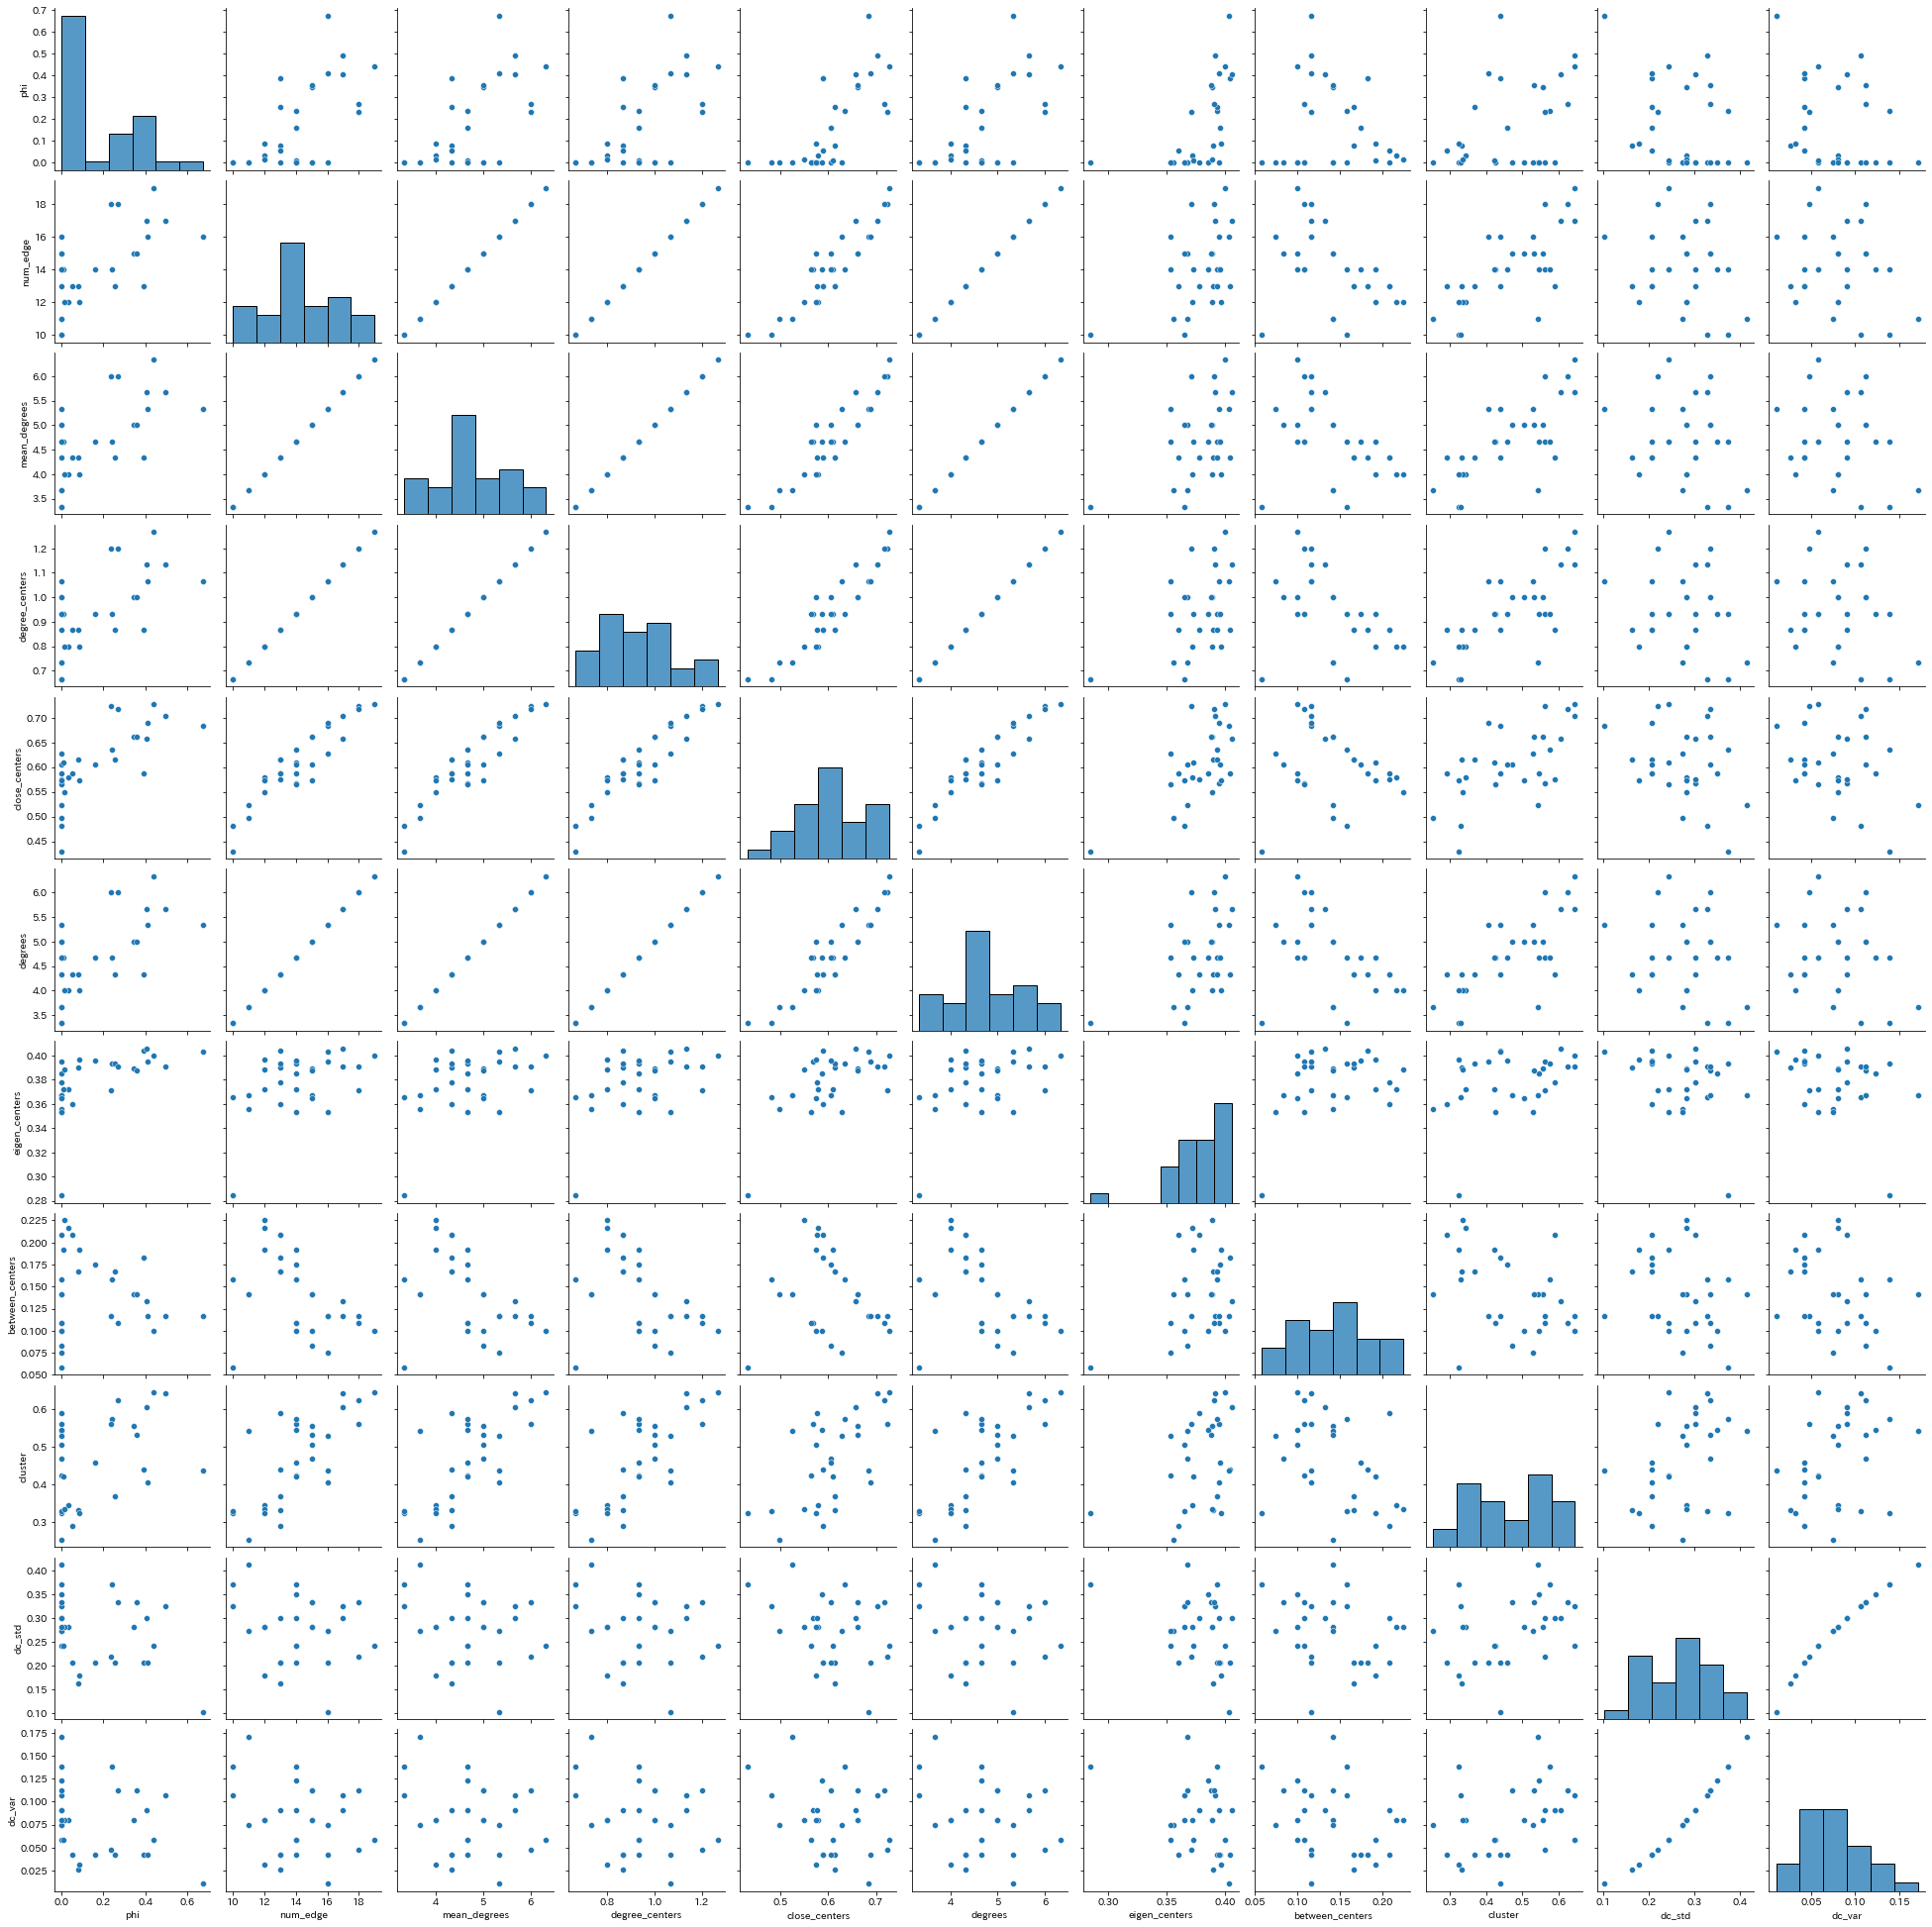

In [42]:
mean_dic = {"phi":phis_list,"num_edge":num_edges,"mean_degrees":mean_degrees, "degree_centers":mean_degree_centers, "close_centers":mean_close_centers, "degrees":mean_degrees, "eigen_centers":mean_eigen_centers,"between_centers":mean_between_centers,"cluster":mean_cluster,"dc_std":degree_centers_std,"dc_var":degree_centers_variance}
mean_df = pd.DataFrame(mean_dic)
sns.pairplot(mean_df)

In [13]:
mean_df.head()

,phi,num_edge,mean_degrees,degree_centers,close_centers,degrees,eigen_centers,between_centers,cluster,dc_std,dc_var,L
0,0.345502,15,5.000000,1.000000,0.661075,5.000000,0.389311,0.141667,0.557212,0.282843,0.080000,1.566667
1,0.000000,14,4.666667,0.933333,0.568148,4.666667,0.394798,0.108333,0.561457,0.301109,0.090667,1.266667
2,0.494857,17,5.666667,1.133333,0.703373,5.666667,0.391447,0.116667,0.643228,0.326599,0.106667,1.466667
3,0.000000,14,4.666667,0.933333,0.564484,4.666667,0.353355,0.108333,0.424166,0.242212,0.058667,1.266667
4,0.000000,10,3.333333,0.666667,0.430093,3.333333,0.284518,0.058333,0.323099,0.372380,0.138667,0.800000


In [191]:
#6node

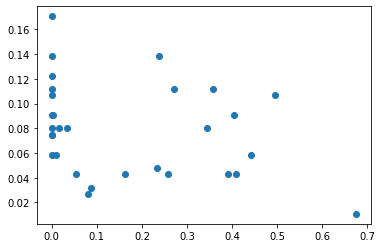

In [17]:
plt.scatter(mean_df["phi"], mean_df["dc_var"])

In [189]:
for i in c_list:
  k, l = pearsonr(mean_df["phi"].values, mean_df[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.613640461204057
degree_centers_p: 0.00031065959121196764
close_centers_r: 0.7312375510713299
close_centers_p: 4.4333994480355376e-06
degrees_r: 0.6136404612040571
degrees_p: 0.00031065959121196715
eigen_centers_r: 0.575074519593707
eigen_centers_p: 0.0008864690295022358
between_centers_r: -0.12404149161855219
between_centers_p: 0.5137151183558925
cluster_r: 0.38401385471554933
cluster_p: 0.03616696429740992
dc_var_r: -0.29598115501816397
dc_var_p: 0.11226640151464387


In [14]:
for i in c_list:
  k, l = spearmanr(mean_df["phi"].values, mean_df[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.5224656211088949
degree_centers_p: 0.00305832322016162
close_centers_r: 0.7884408100174422
close_centers_p: 2.2907394947604877e-07
degrees_r: 0.5383217050222283
degrees_p: 0.00215008376130354
eigen_centers_r: 0.766139588462975
eigen_centers_p: 8.021166309657766e-07
between_centers_r: 0.15452318463959094
between_centers_p: 0.41489525083948886
cluster_r: 0.3248159852862258
cluster_p: 0.07988813622706625
dc_var_r: -0.3522733849701369
dc_var_p: 0.056235574540257495


In [192]:
#5node

In [216]:
for i in c_list:
  k, l = pearsonr(mean_df["phi"].values, mean_df[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.7313282561485811
degree_centers_p: 4.415248576196295e-06
close_centers_r: 0.7918117797486539
close_centers_p: 1.8710845888077364e-07
degrees_r: 0.7313282561485811
degrees_p: 4.415248576196295e-06
eigen_centers_r: 0.5785527096719629
eigen_centers_p: 0.000810760336854726
between_centers_r: 0.11962901965457938
between_centers_p: 0.528916545359174
cluster_r: 0.6193884844553759
cluster_p: 0.0002626004407530551
dc_var_r: 0.17466924445773982
dc_var_p: 0.3559157836352597


In [217]:
for i in c_list:
  k, l = spearmanr(mean_df["phi"].values, mean_df[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.7158366356562548
degree_centers_p: 8.697727559329318e-06
close_centers_r: 0.8220731752713116
close_centers_p: 2.5361281324961015e-08
degrees_r: 0.7158366356562548
degrees_p: 8.697727559329318e-06
eigen_centers_r: 0.7430410463530492
eigen_centers_p: 2.563228543419265e-06
between_centers_r: 0.41879786380120304
between_centers_p: 0.0212556508812346
cluster_r: 0.5879059949589652
cluster_p: 0.0006345433238099604
dc_var_r: 0.004345173211723428
dc_var_p: 0.9818191646722436


# randomnetworks

In [28]:
def make_cm(nodes, seed):
    np.random.seed(seed)
    a = np.random.randint(0, 2,(len(nodes),len(nodes)))
    b = np.diag(a, k=0)
    cm = a - np.diag(b)

    edges = []
    for col in range(len(cm)):
        for row in range(len(cm)):
            if cm[col][row] == 1:
                edges.append((nodes[col],nodes[row]))
    
    return cm, edges

In [29]:
random_l = []
random_c = []

In [30]:
for seed in range(30):
    cm, edges = make_cm(nodes, seed)
    
    
    # 有向グラフを作成する。
    G = nx.DiGraph()
    # ノード一覧を追加する。
    G.add_nodes_from(nodes)
    # エッジ一覧を追加する。
    G.add_edges_from(edges)
    

    random_l.append(nx.average_shortest_path_length(G))
    random_c.append(nx.algorithms.cluster.average_clustering(G))

In [31]:
c_random = sum(random_c)/len(random_c)
l_random = sum(random_l)/len(random_l)

# smallworld

In [32]:
mean_c = nx.algorithms.cluster.average_clustering(G)
mean_l = nx.average_shortest_path_length(G)

In [33]:
gamma = [x/c_random for x in mean_cluster]

In [34]:
gamma = [x/c_random for x in mean_cluster]
s_lambda = [x/l_random for x in mean_short_path_length]

In [35]:
g = np.array(gamma)
l = np.array(s_lambda)

In [36]:
sigma = g/l

In [37]:
sigma = list(sigma)

In [14]:
mean_dic = {"phi":phis_list, "degree_centers":mean_degree_centers, "close_centers":mean_close_centers, "degrees":mean_degrees, "eigen_centers":mean_eigen_centers,"between_centers":mean_between_centers,"cluster":mean_cluster, "gamma":gamma,"lambda":s_lambda,"sigma":sigma}
mean_df = pd.DataFrame(mean_dic)
sns.pairplot(mean_df)

NameError: name 'gamma' is not defined

In [92]:
smallworld = ["gamma","lambda","sigma"]
s_list = c_list + smallworld

In [94]:
print(s_list)

['degree_centers', 'close_centers', 'degrees', 'eigen_centers', 'between_centers', 'cluster', 'gamma', 'lambda', 'sigma']


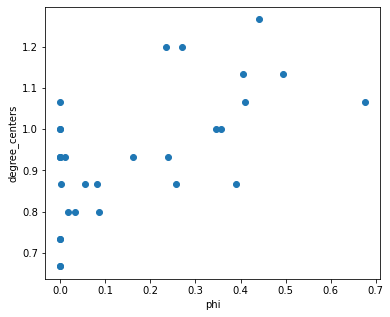

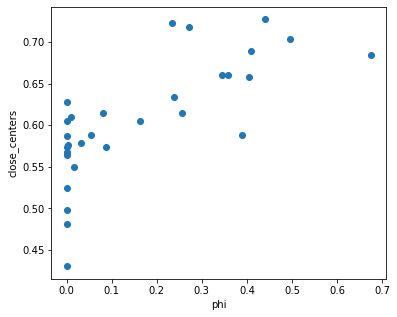

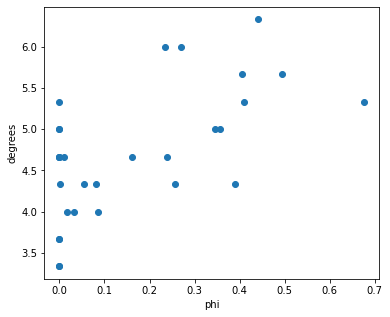

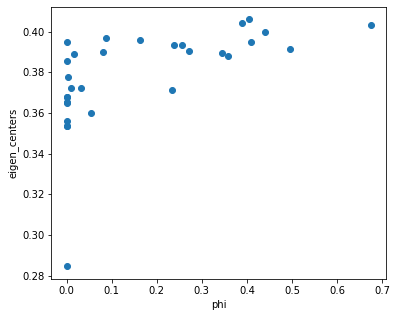

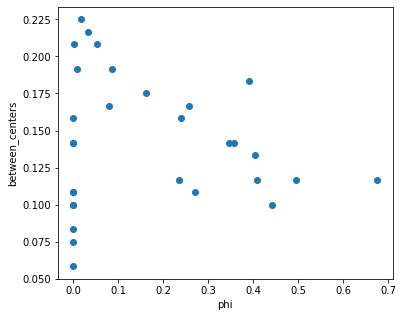

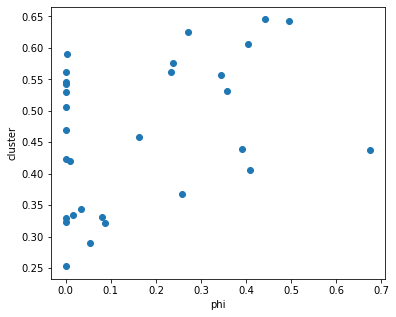

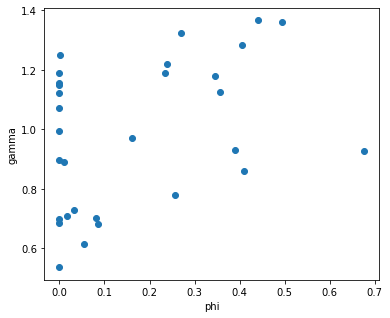

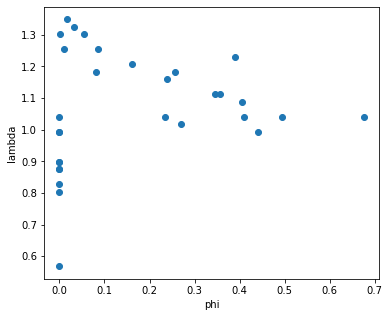

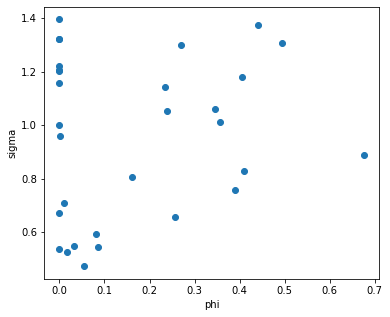

In [95]:
for i in s_list:
    
    fig_path = os.path.join("fig/{}.jpg").format(i)
    fig, ax = plt.subplots(figsize=(6, 5))
    plt.scatter(mean_df["phi"], mean_df[i])
    plt.xlabel("phi")
    plt.ylabel(i)
    plt.savefig(fig_path) 
    plt.show()


In [238]:
a = mean_df[mean_df["phi"] != 0]

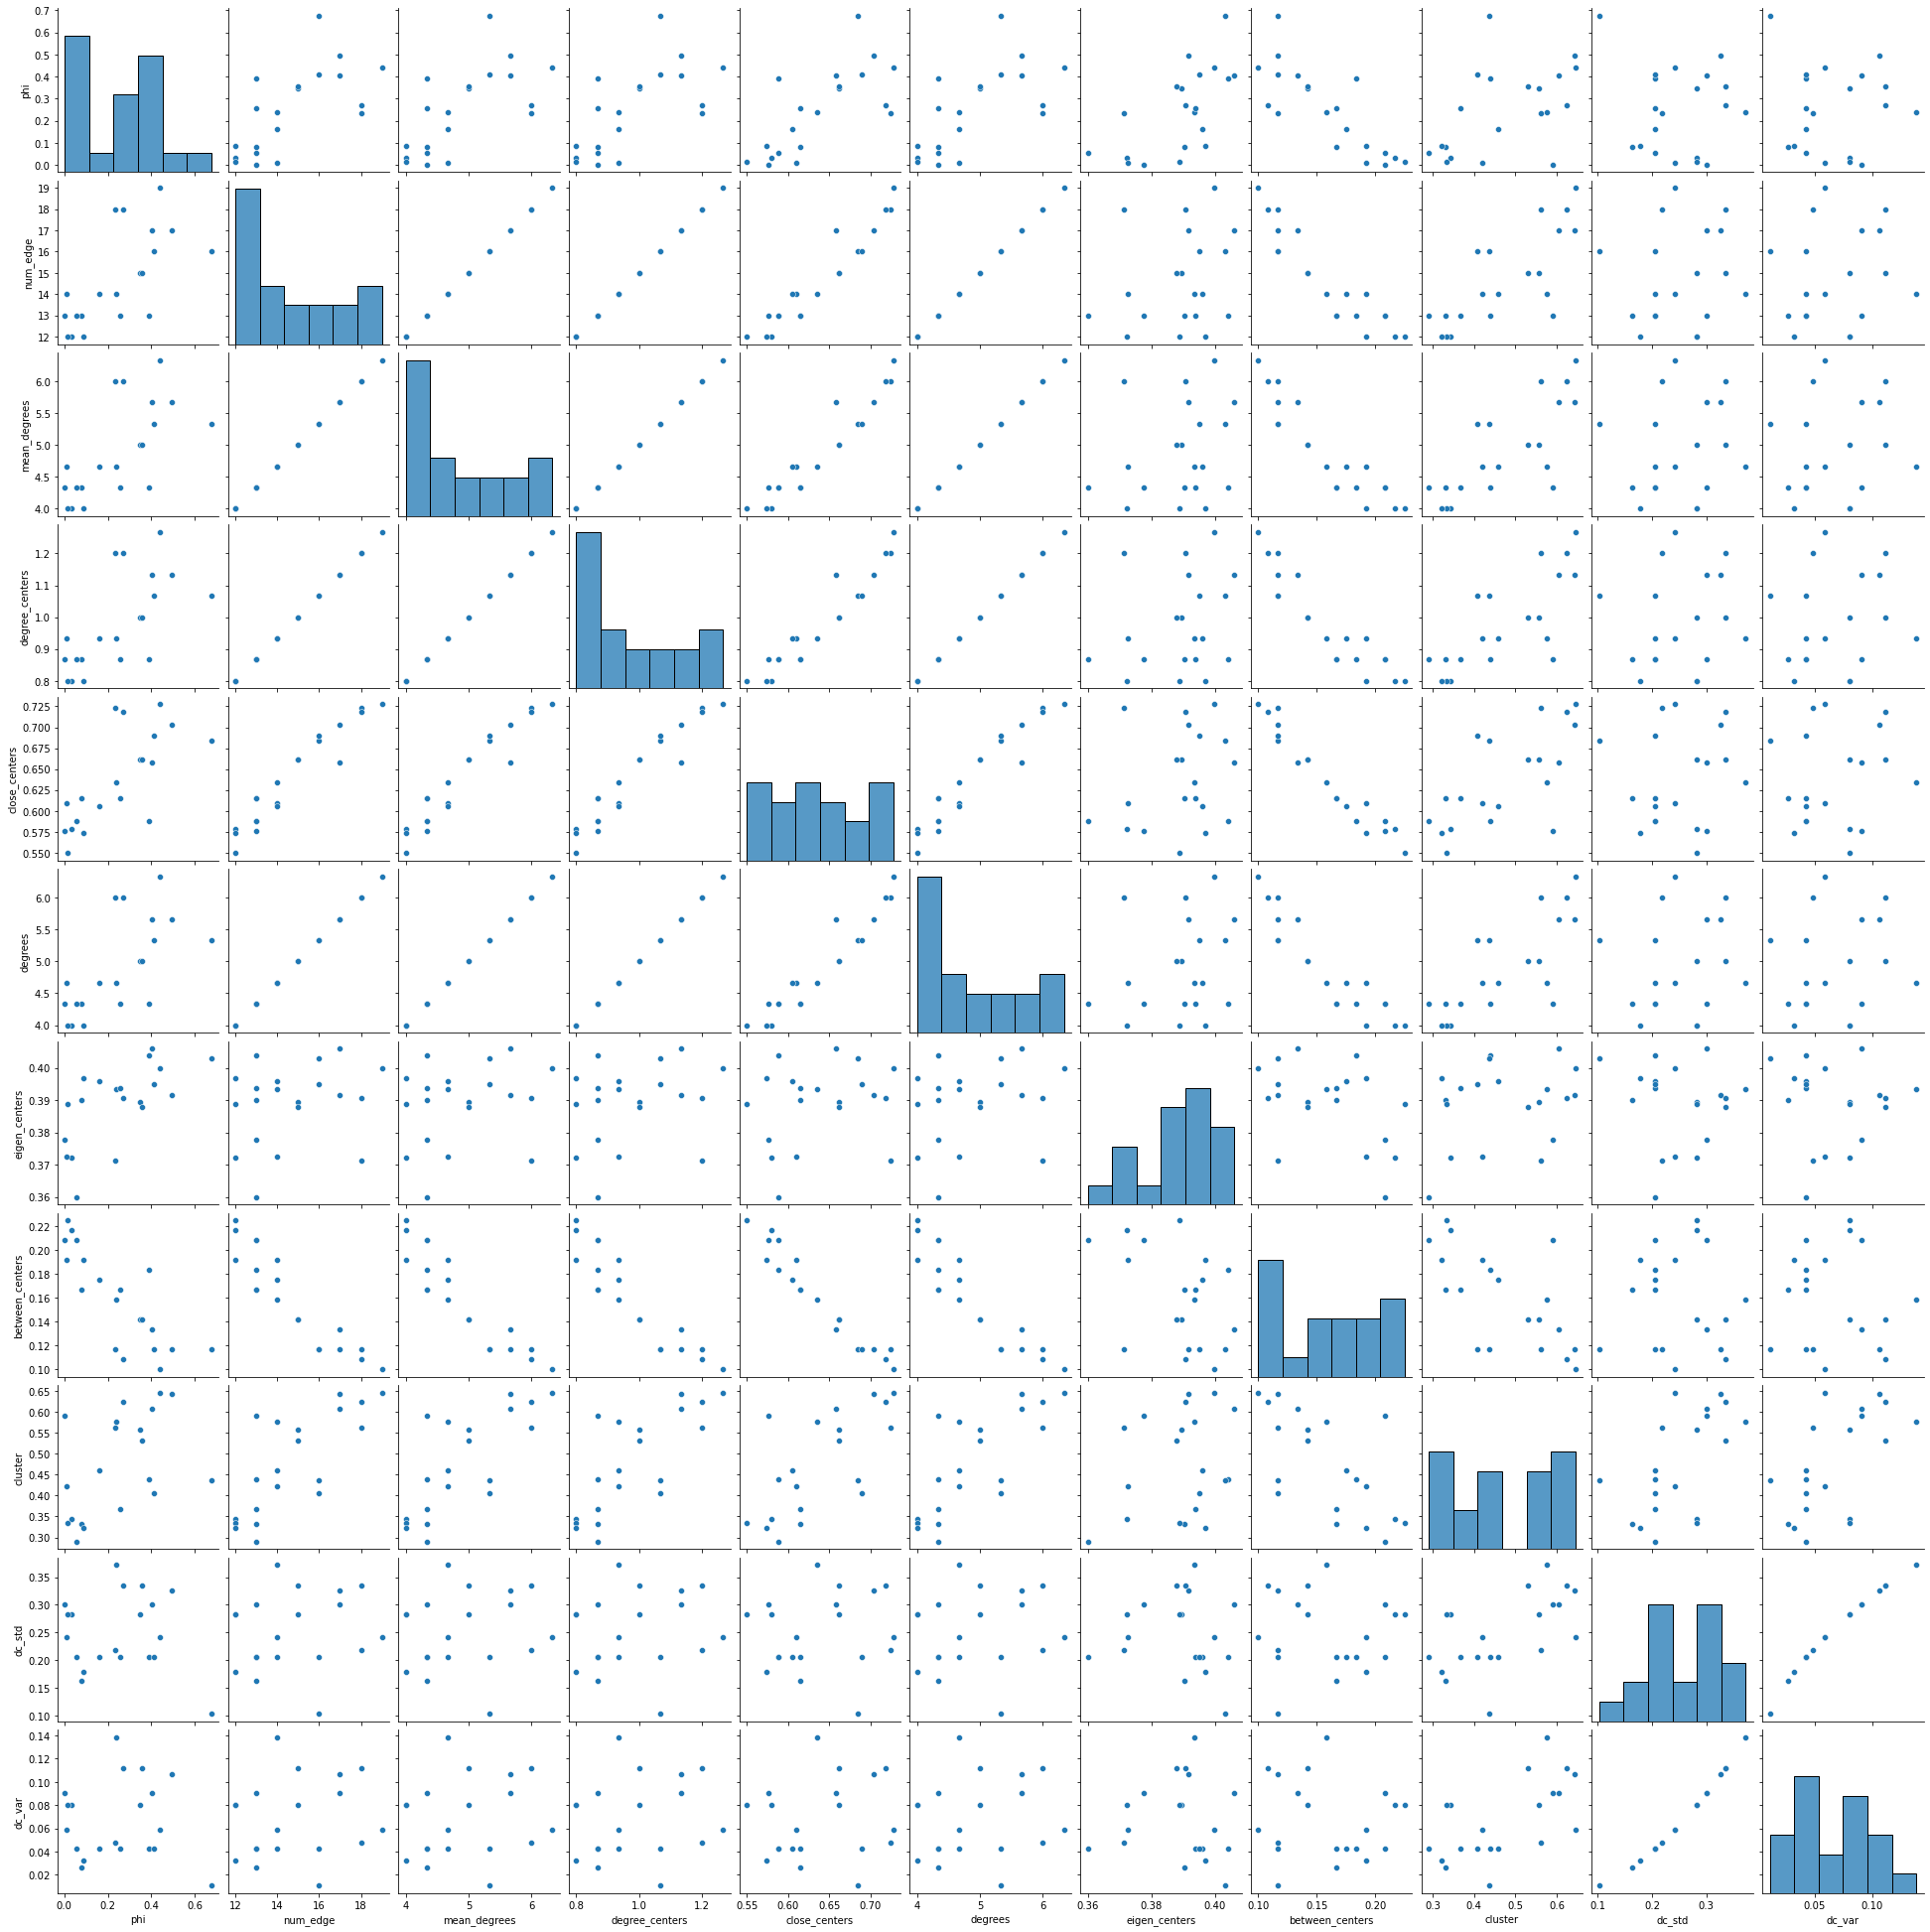

In [240]:
sns.pairplot(a)

In [44]:
c_list = ["num_edge"]

In [45]:
for i in c_list:
  k, l = spearmanr(mean_5["phi"].values, mean_5[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

num_edge_r: 0.7158366356562548
num_edge_p: 8.697727559329318e-06


In [46]:
for i in c_list:
  k, l = spearmanr(mean_6["phi"].values, mean_6[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

num_edge_r: 0.5383217050222283
num_edge_p: 0.00215008376130354


In [221]:
for i in c_list:
  k, l = spearmanr(a["phi"].values, a[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.6902898893236963
degree_centers_p: 0.004392529782611013
close_centers_r: 0.7535714285714286
close_centers_p: 0.001177583023488826
degrees_r: 0.6902898893236963
degrees_p: 0.004392529782611013
eigen_centers_r: 0.4928571428571427
eigen_centers_p: 0.06195100671416867
between_centers_r: -0.8254282232460995
between_centers_p: 0.00015098002622177735
cluster_r: 0.8214285714285712
cluster_p: 0.00017314771750717042
dc_var_r: 0.7906869630934533
dc_var_p: 0.00044912418260345993


In [239]:
for i in c_list:
  k, l = spearmanr(a["phi"].values, a[i].values)
  print("{0}_r:".format(i),k)
  print("{0}_p:".format(i),l)

degree_centers_r: 0.6729786858553105
degree_centers_p: 0.0011468716074411825
close_centers_r: 0.7333584572776161
close_centers_p: 0.0002339789567332209
degrees_r: 0.6865044722852829
degrees_p: 0.0008293753191813991
eigen_centers_r: 0.6601503759398496
eigen_centers_p: 0.001537048632118307
between_centers_r: -0.8218470317663799
between_centers_p: 8.81667056171943e-06
cluster_r: 0.4827067669172932
cluster_p: 0.031105216869543383
dc_var_r: 0.040739578419719084
dc_var_p: 0.8645919853832078


In [58]:
mean_5.head()

,phi,degree_centers,close_centers,degrees,eigen_centers,between_centers,cluster,gamma,lambda,sigma
0,0.000000,0.6,0.414286,2.4,0.424264,0.250000,0.166667,0.384561,1.135531,0.338662
1,0.000000,0.7,0.437500,2.8,0.389300,0.133333,0.330000,0.761431,0.769231,0.989860
2,0.122641,1.2,0.702222,4.8,0.414899,0.166667,0.574530,1.325651,1.098901,1.206342
3,0.213537,1.4,0.780000,5.6,0.426138,0.116667,0.675043,1.557571,0.989011,1.574877
4,0.000000,1.0,0.582222,4.0,0.383592,0.133333,0.528889,1.220340,0.879121,1.388137


In [243]:
a.sort_values("phi",)

,phi,num_edge,mean_degrees,degree_centers,close_centers,degrees,eigen_centers,between_centers,cluster,dc_std,dc_var
15,0.002208,13,4.333333,0.866667,0.575758,4.333333,0.377623,0.208333,0.590132,0.301109,0.090667
14,0.009695,14,4.666667,0.933333,0.609437,4.666667,0.372503,0.191667,0.420940,0.242212,0.058667
23,0.016511,12,4.000000,0.800000,0.549663,4.000000,0.388889,0.225000,0.334046,0.282843,0.080000
9,0.032756,12,4.000000,0.800000,0.578984,4.000000,0.372277,0.216667,0.343483,0.282843,0.080000
25,0.053704,13,4.333333,0.866667,0.588294,4.333333,0.359891,0.208333,0.290171,0.206559,0.042667
5,0.080718,13,4.333333,0.866667,0.614779,4.333333,0.390169,0.166667,0.331019,0.163299,0.026667
29,0.086264,12,4.000000,0.800000,0.573443,4.000000,0.396759,0.191667,0.322222,0.178885,0.032000
26,0.161766,14,4.666667,0.933333,0.605159,4.666667,0.395835,0.175000,0.458995,0.206559,0.042667
12,0.234421,18,6.000000,1.200000,0.723575,6.000000,0.371320,0.116667,0.561031,0.219089,0.048000
7,0.238695,14,4.666667,0.933333,0.634620,4.666667,0.393368,0.158333,0.575833,0.372380,0.138667


In [15]:
mean_dic = {"phi":phis_list,"num_edge":num_edges,"mean_degrees":mean_degrees, "degree_centers":mean_degree_centers, "close_centers":mean_close_centers, "degrees":mean_degrees, "eigen_centers":mean_eigen_centers,"between_centers":mean_between_centers,"cluster":mean_cluster,"dc_std":degree_centers_std,"dc_var":degree_centers_variance}
mean_df = pd.DataFrame(mean_dic)

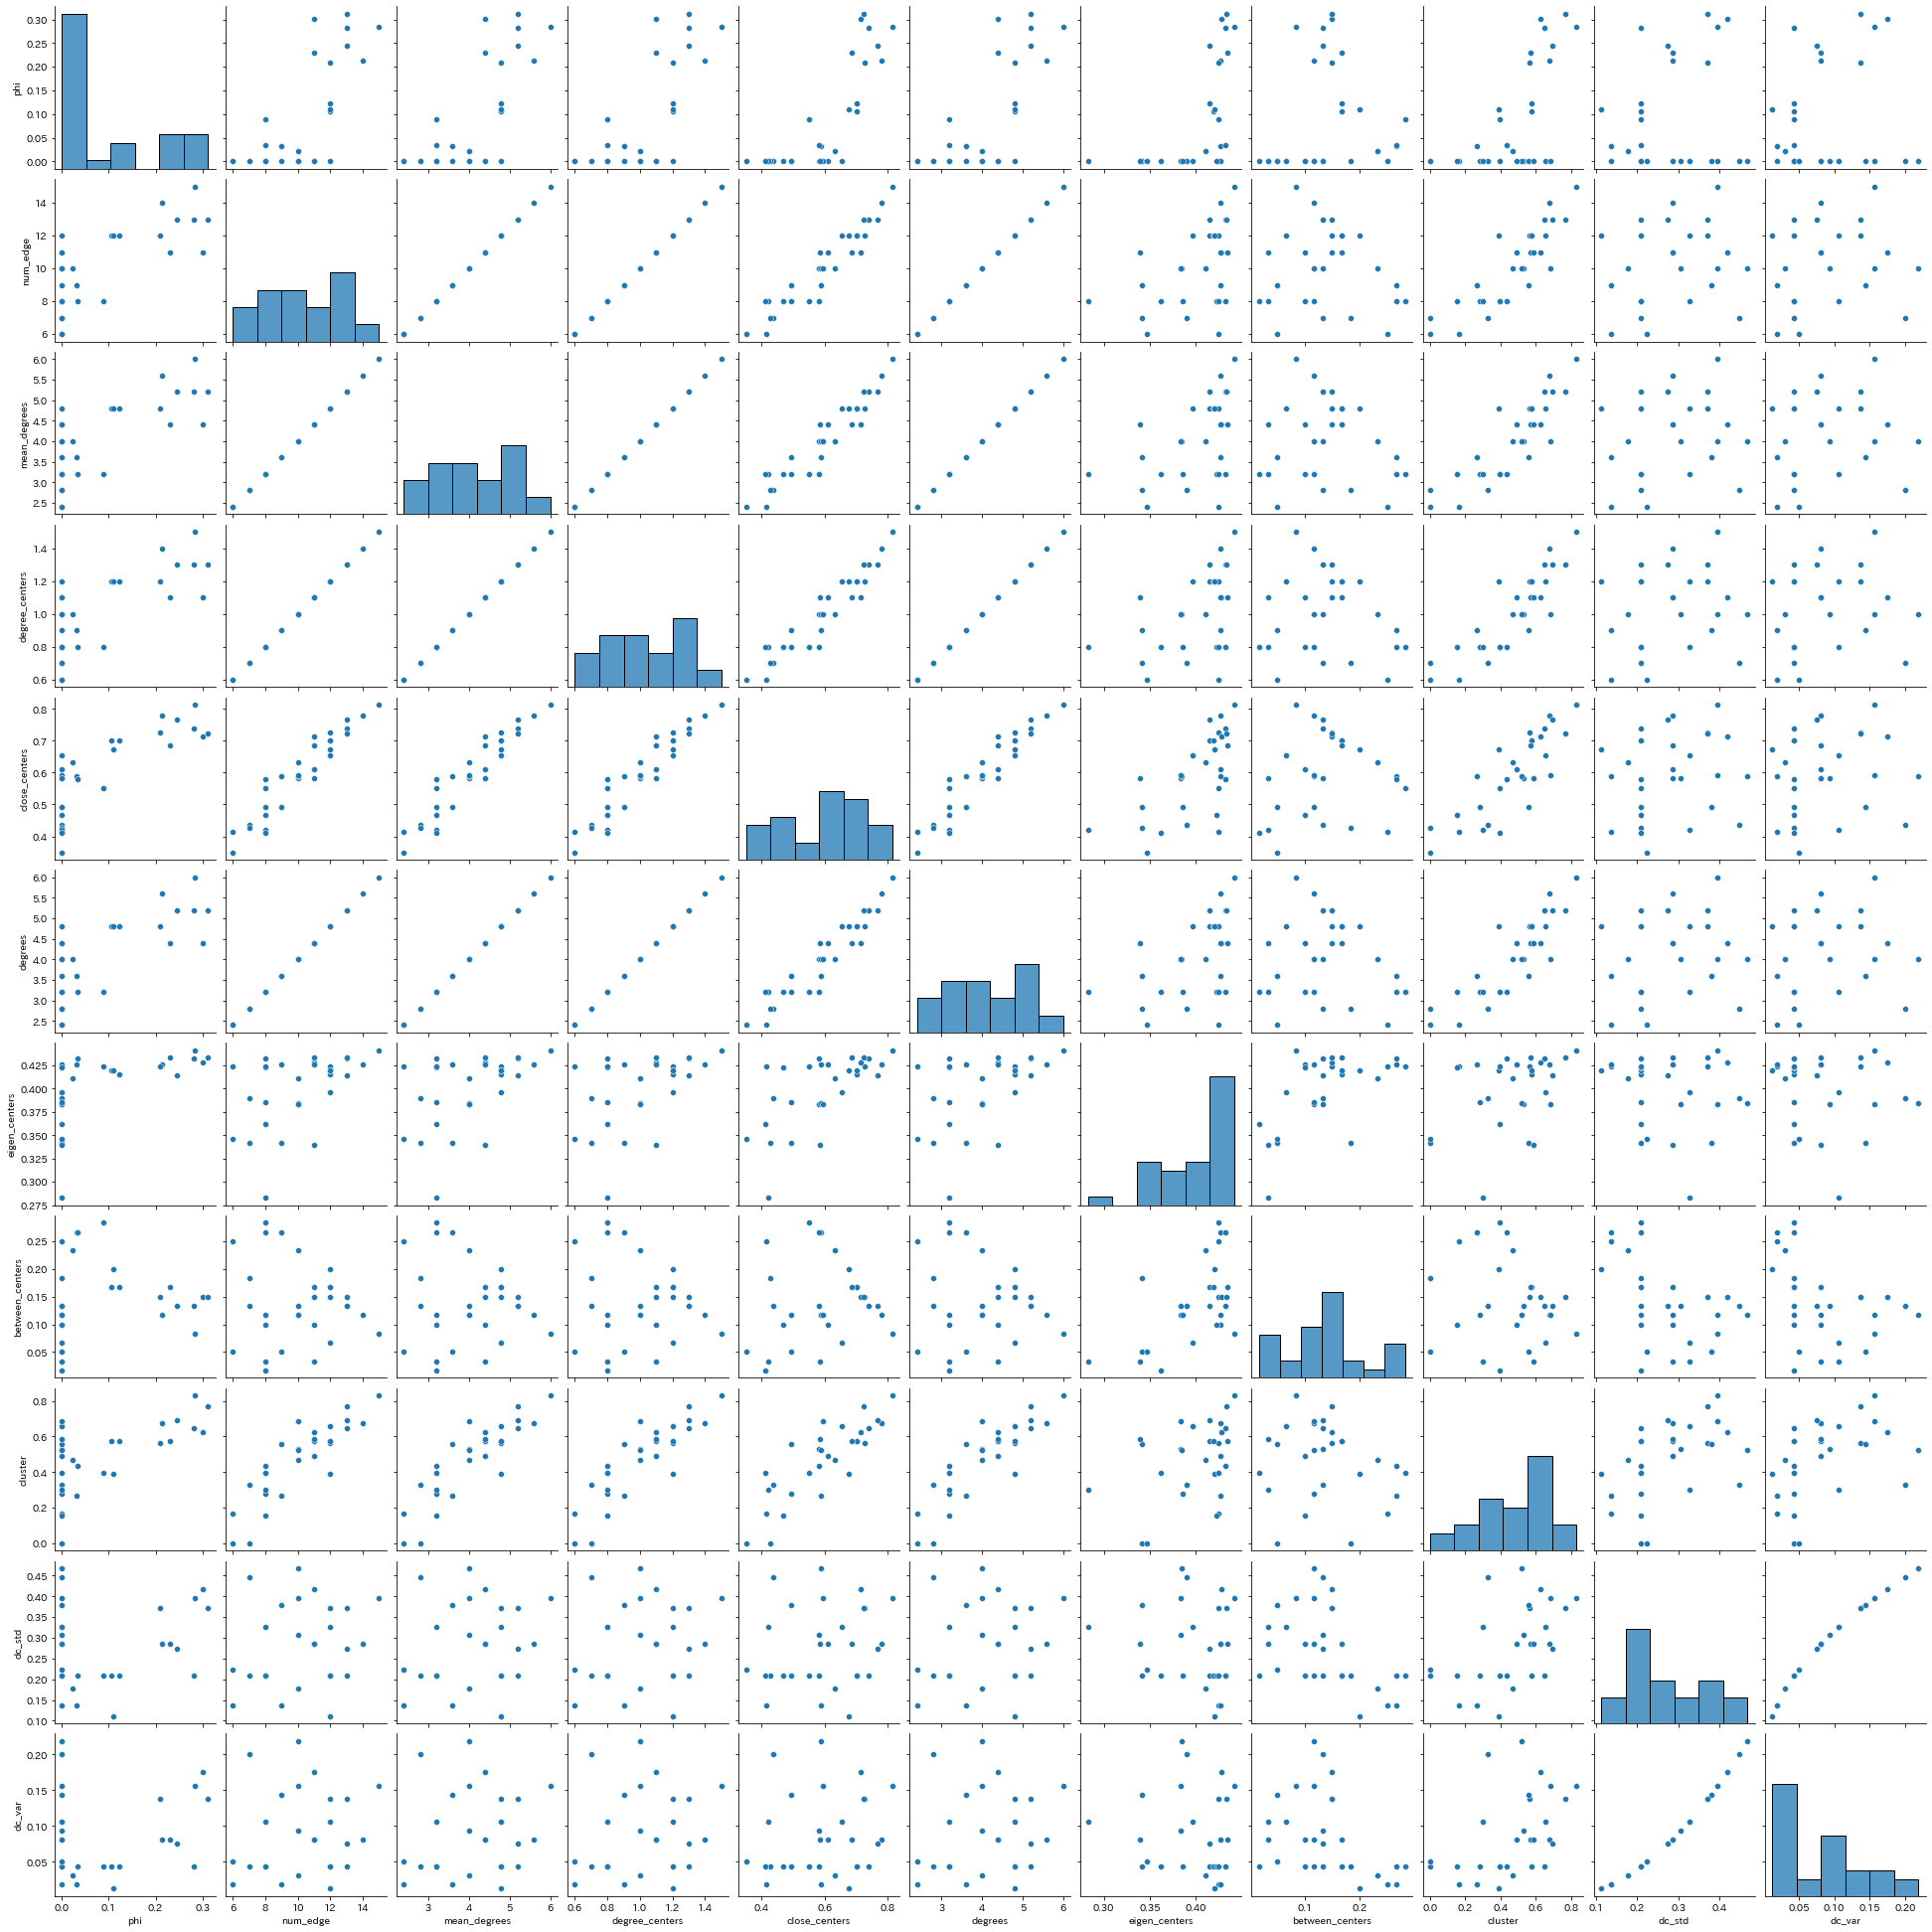

In [16]:
sns.pairplot(mean_df)

<AxesSubplot:>

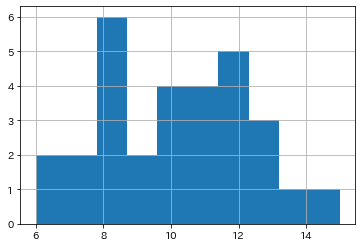

In [18]:
mean_df["num_edge"].hist()

In [34]:
mean_6 = mean_df

In [19]:
mean_5 = mean_df

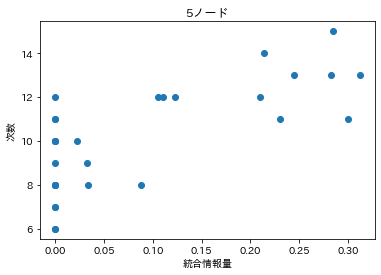

In [42]:
plt.scatter(mean_5["phi"], mean_5["num_edge"])
plt.xlabel("統合情報量")
plt.ylabel("次数")
plt.title("5ノード")
plt.savefig("small/phi-num_d-5")

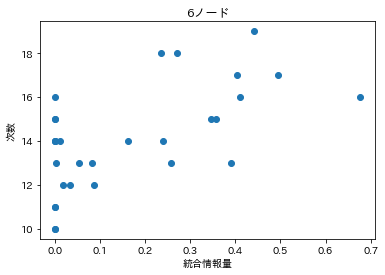

In [17]:
plt.scatter(mean_6["phi"], mean_6["num_edge"])
plt.xlabel("統合情報量")
plt.ylabel("次数")
plt.title("6ノード")
plt.savefig("small/phi-num_d-6") 

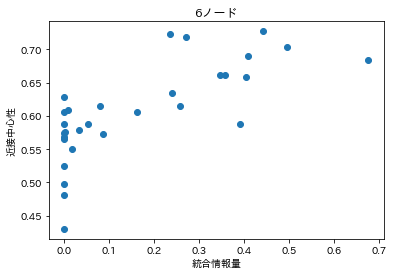

In [47]:
plt.scatter(mean_6["phi"], mean_6["close_centers"])
plt.xlabel("統合情報量")
plt.ylabel("近接中心性")
plt.title("6ノード")
plt.savefig("small/phi-c-6") 

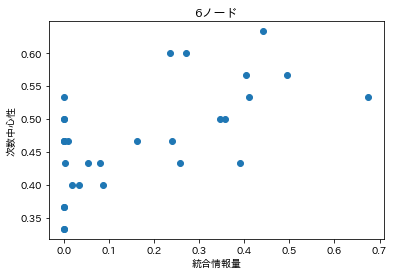

In [53]:
plt.scatter(mean_6["phi"], mean_6["degree_centers"] / 2)
plt.xlabel("統合情報量")
plt.ylabel("次数中心性")
plt.title("6ノード")
plt.savefig("small/phi-d-6") 

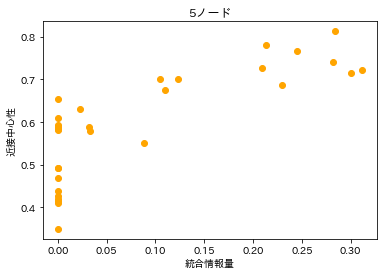

In [49]:
plt.scatter(mean_5["phi"], mean_5["close_centers"], c="orange")
plt.xlabel("統合情報量")
plt.ylabel("近接中心性")
plt.title("5ノード")
plt.savefig("small/phi-c-5") 

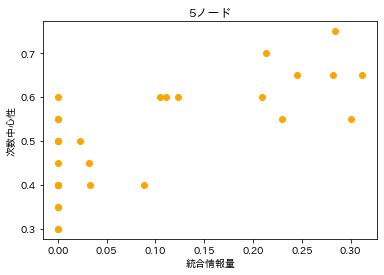

In [52]:
plt.scatter(mean_5["phi"], mean_5["degree_centers"] / 2, c="orange")
plt.xlabel("統合情報量")
plt.ylabel("次数中心性")
plt.title("5ノード")
plt.savefig("small/phi-d-5") 

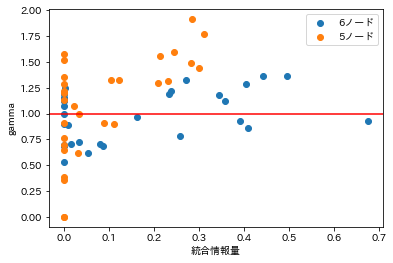

In [78]:
plt.scatter(mean_6["phi"], mean_6["gamma"], label="6ノード")
plt.scatter(mean_5["phi"], mean_5["gamma"], label="5ノード")
plt.xlabel("統合情報量")
plt.ylabel("gamma")
plt.axhline(y=1, xmin=0, xmax=1,color="red")
plt.legend()
plt.savefig("small/gamma.jpg") 

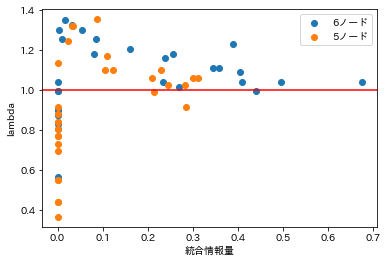

In [79]:
plt.scatter(mean_6["phi"], mean_6["lambda"], label="6ノード")
plt.scatter(mean_5["phi"], mean_5["lambda"], label="5ノード")
plt.xlabel("統合情報量")
plt.ylabel("lambda")
plt.axhline(y=1, xmin=0, xmax=1,color="red")
plt.legend()
plt.savefig("small/lambda.jpg") 

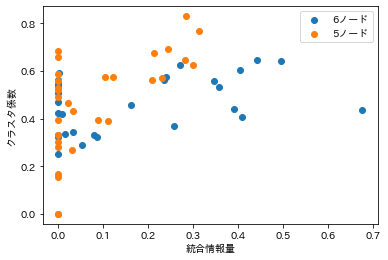

In [73]:
plt.scatter(mean_6["phi"], mean_6["cluster"], label="6ノード")
plt.scatter(mean_5["phi"], mean_5["cluster"], label="5ノード")
plt.xlabel("統合情報量")
plt.ylabel("クラスタ係数")
plt.legend()
plt.savefig("small/cluster.jpg") 

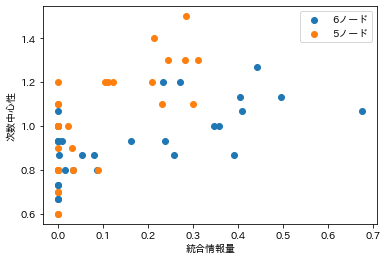

In [50]:
plt.scatter(mean_6["phi"], mean_6["degree_centers"], label="6ノード")
plt.scatter(mean_5["phi"], mean_5["degree_centers"], label="5ノード")
plt.xlabel("統合情報量")
plt.ylabel("次数中心性")
plt.legend()
plt.savefig("small/phi-degree.jpg") 

In [ ]:
plt.scatter(mean_6["phi"], mean_6["degree_centers"], label="6ノード")
plt.scatter(mean_5["phi"], mean_5["degree_centers"], label="5ノード")
plt.legend()
#plt.savefig("small/degree_centers.jpg") 

(array([2., 2., 6., 2., 4., 4., 5., 3., 1., 1.]),
 array([2.4 , 2.76, 3.12, 3.48, 3.84, 4.2 , 4.56, 4.92, 5.28, 5.64, 6.  ]),
 <BarContainer object of 10 artists>)

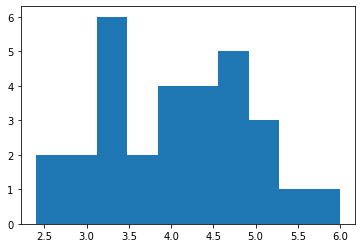

In [66]:
plt.hist(mean_5["degrees"])

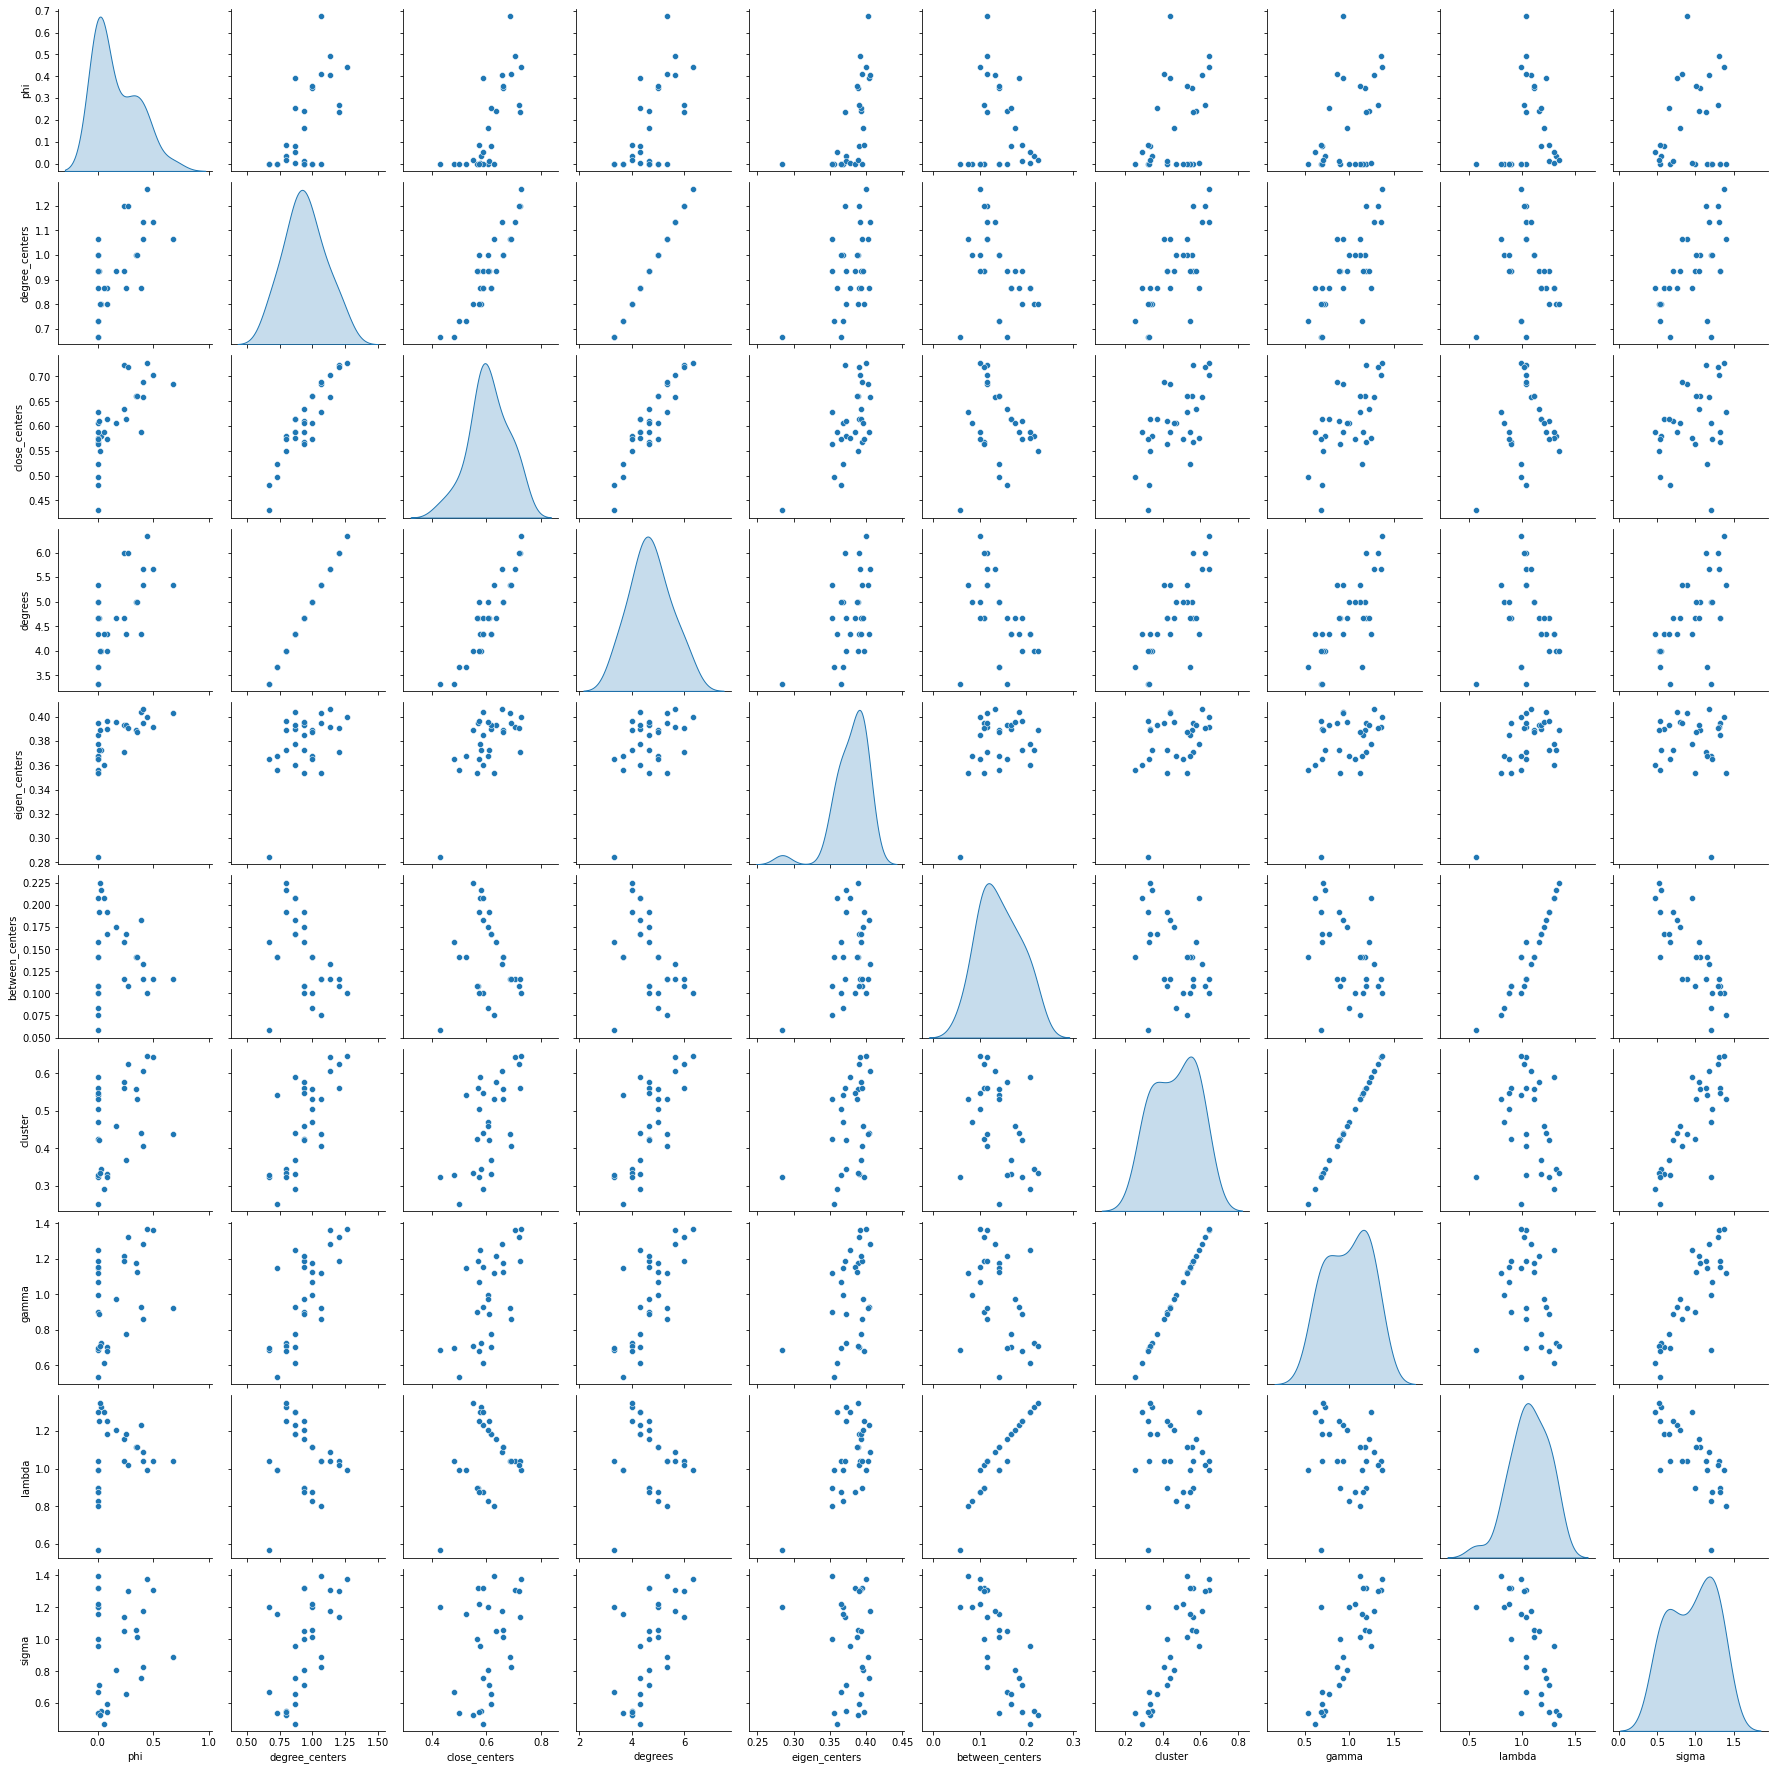

In [68]:
sns.pairplot(mean_6, diag_kind='kde')

<AxesSubplot:xlabel='degrees', ylabel='Density'>

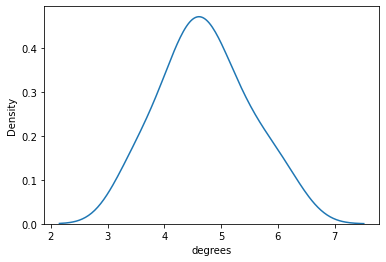

In [69]:
sns.kdeplot(mean_6["degrees"])

(array([2., 2., 3., 5., 6., 4., 3., 2., 2., 1.]),
 array([3.33333333, 3.63333333, 3.93333333, 4.23333333, 4.53333333,
        4.83333333, 5.13333333, 5.43333333, 5.73333333, 6.03333333,
        6.33333333]),
 <BarContainer object of 10 artists>)

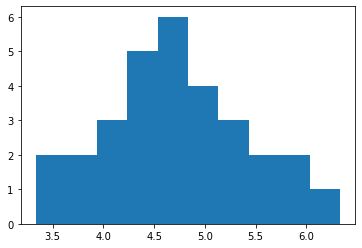

In [86]:
plt.hist(mean_6["degrees"], bins=10)

<AxesSubplot:xlabel='degrees', ylabel='Density'>

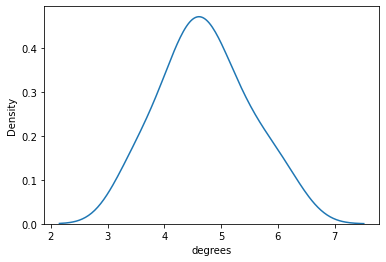

In [88]:
sns.kdeplot(mean_6["degrees"],)

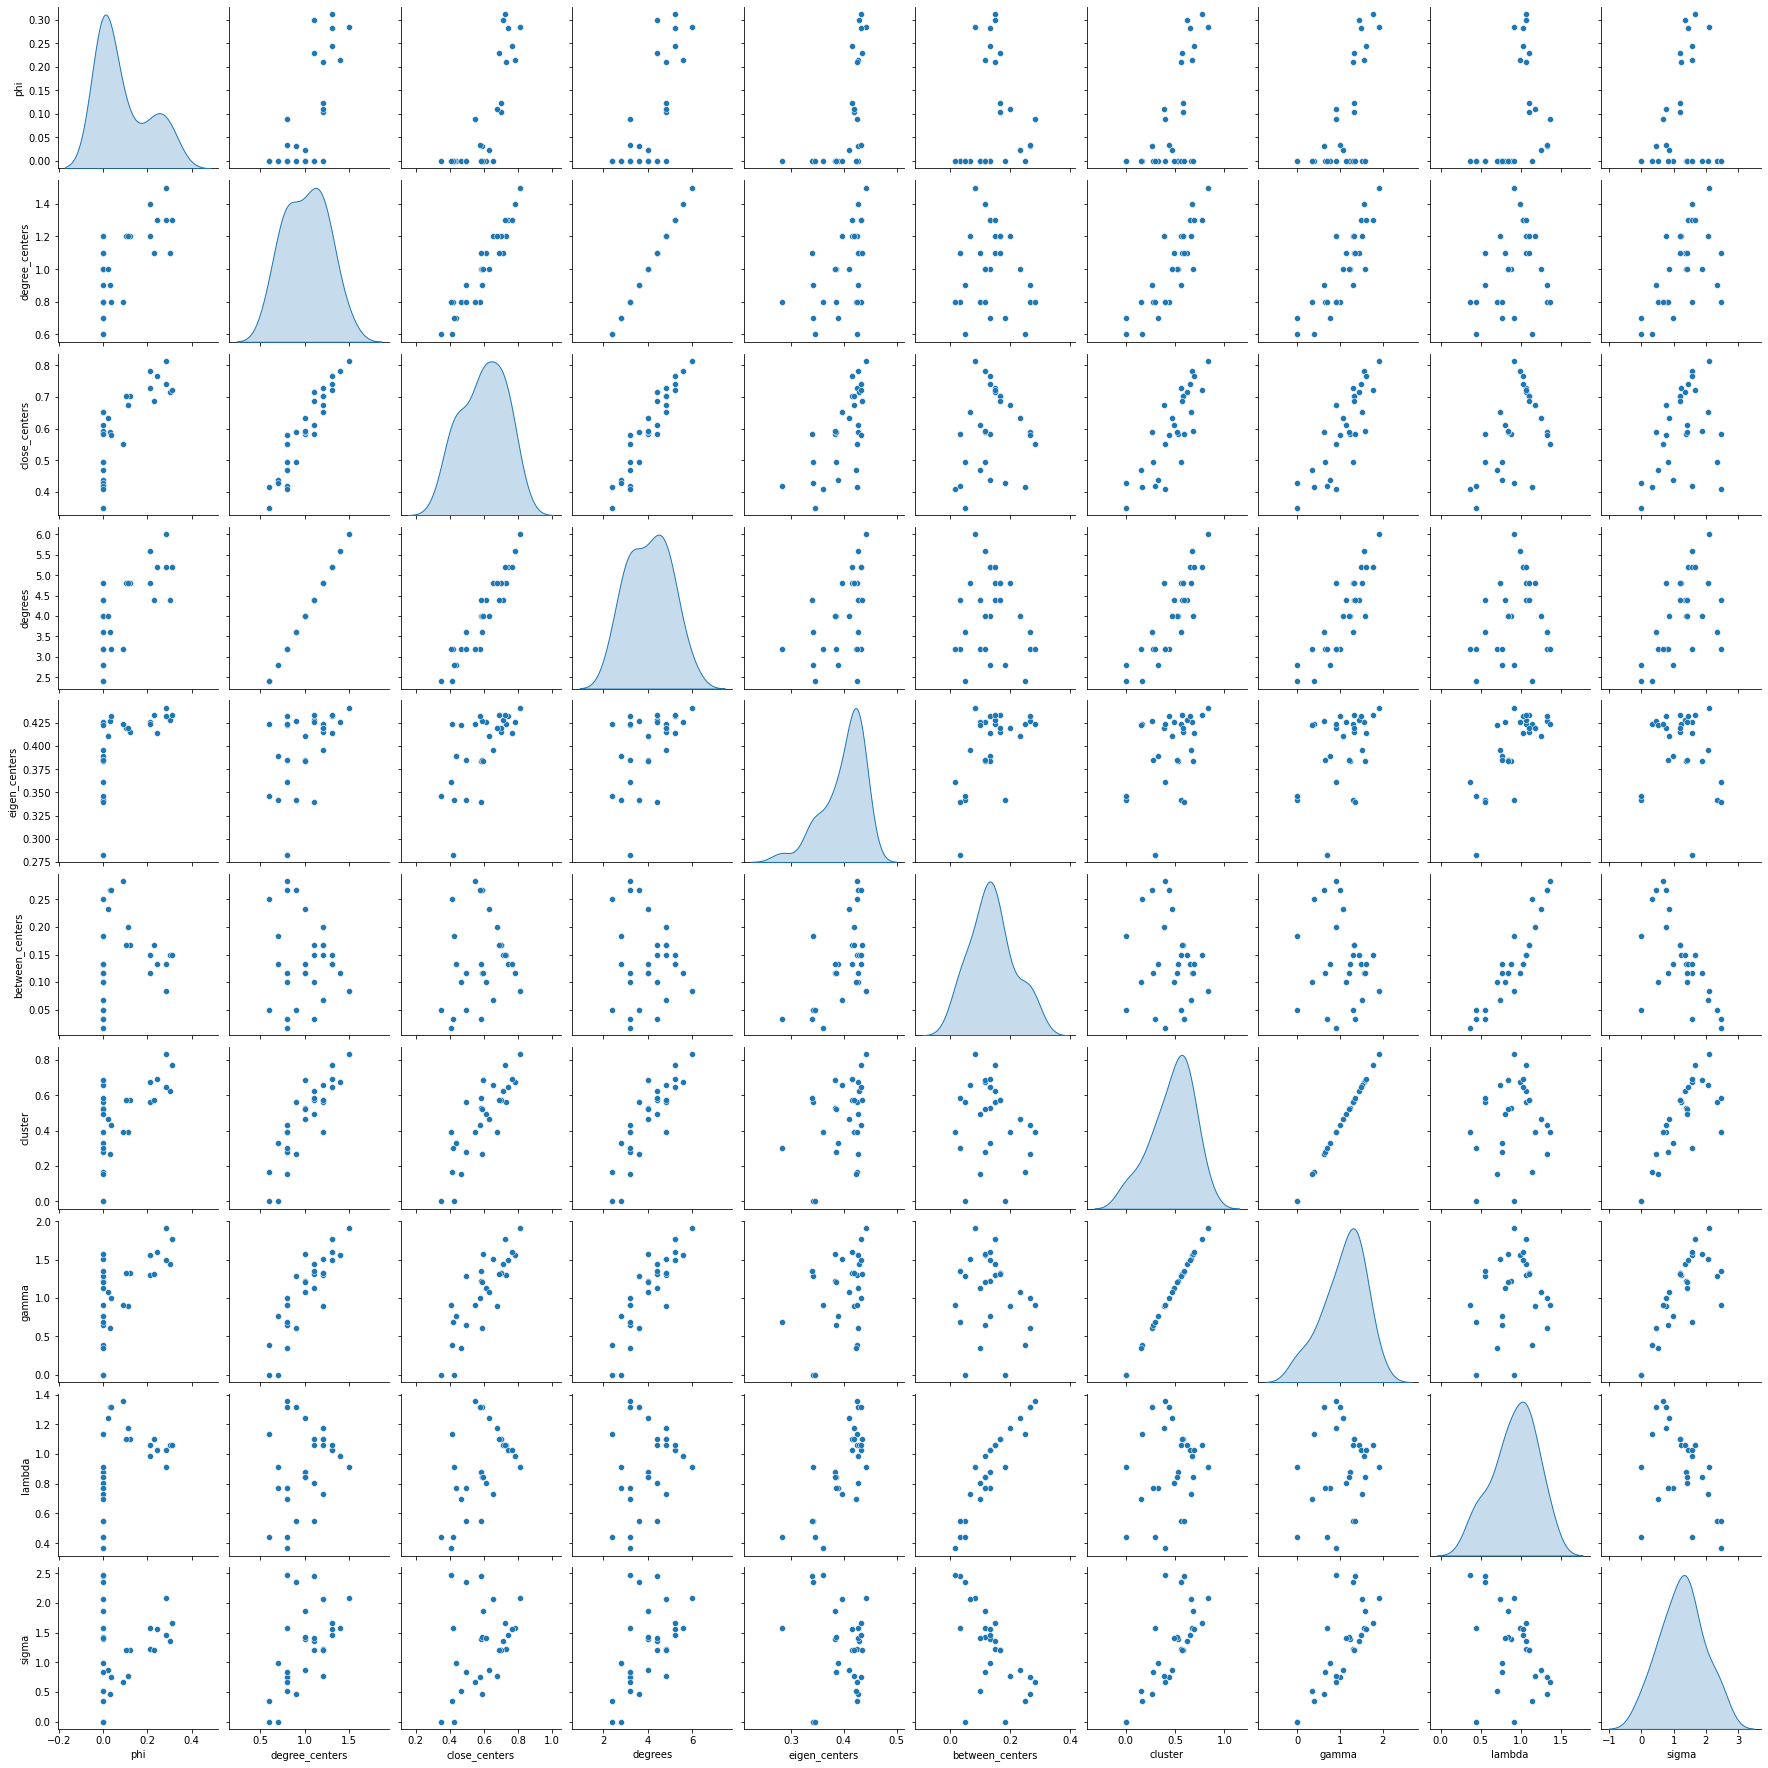

In [89]:
sns.pairplot(mean_5, diag_kind='kde')

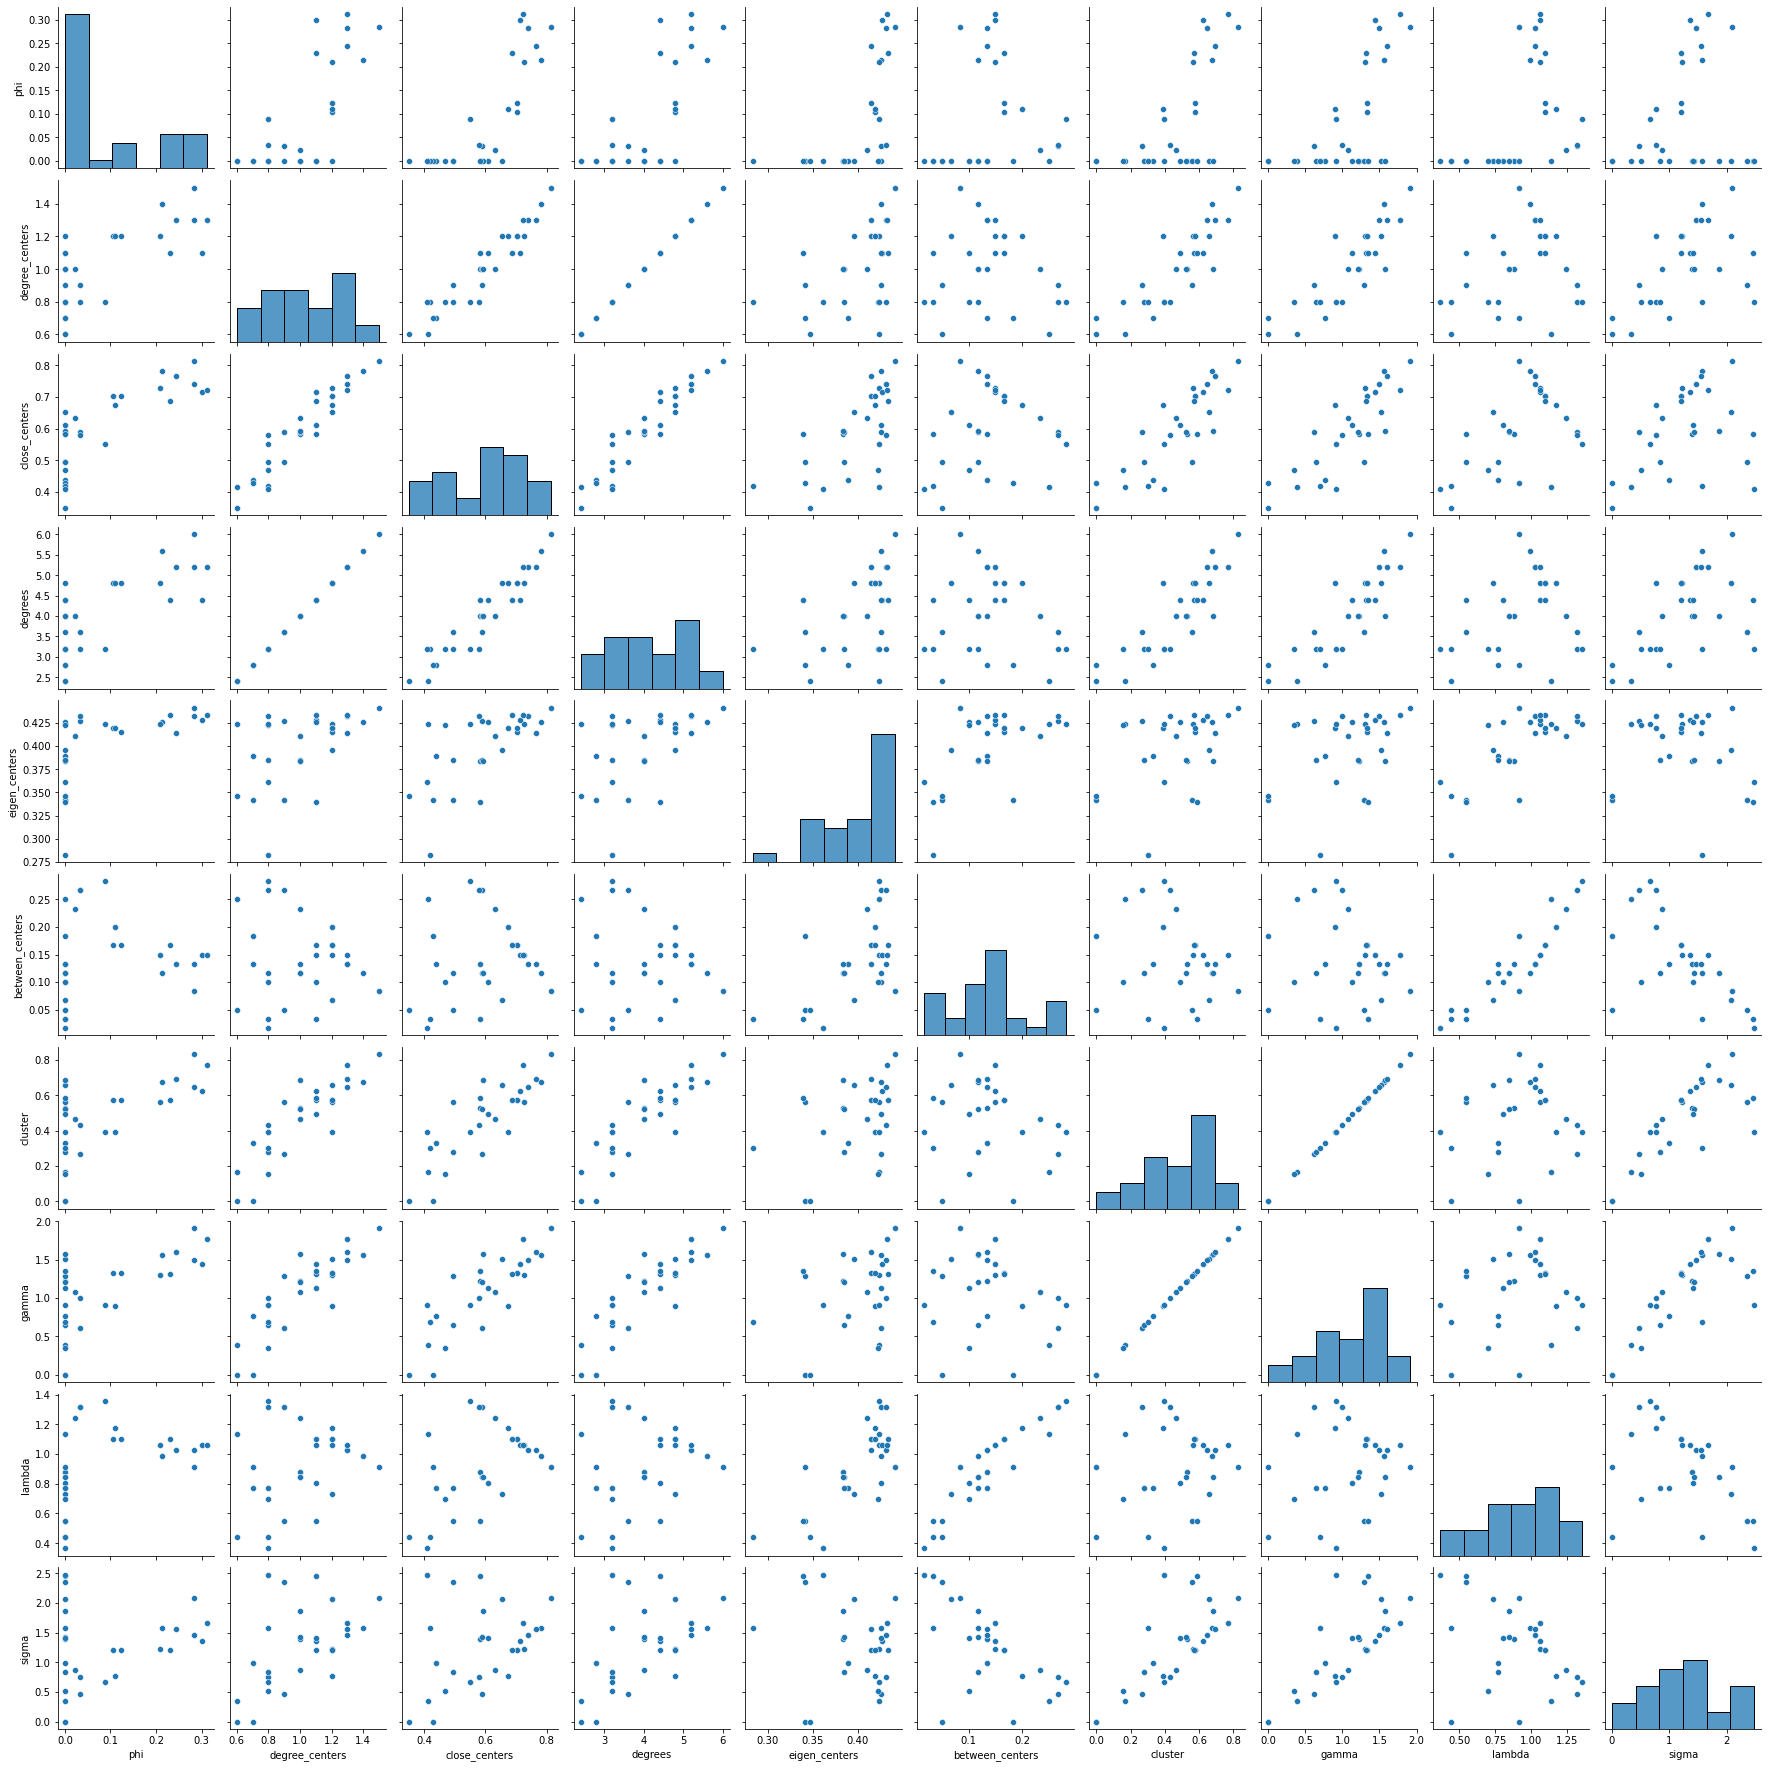

In [90]:
sns.pairplot(mean_5)

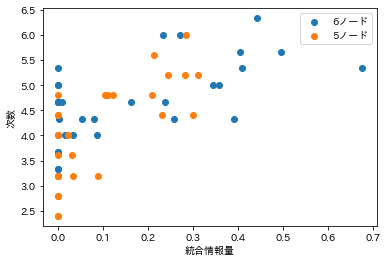

In [71]:
plt.scatter(mean_6["phi"], mean_6["degrees"], label="6ノード")
plt.scatter(mean_5["phi"], mean_5["degrees"], label="5ノード")
plt.xlabel("統合情報量")
plt.ylabel("次数")
plt.legend()
plt.savefig("small/degree-phis.jpg") 

In [95]:
mean_5.head()

,phi,degree_centers,close_centers,degrees,eigen_centers,between_centers,cluster,gamma,lambda,sigma
0,0.000000,0.6,0.414286,2.4,0.424264,0.250000,0.166667,0.384561,1.135531,0.338662
1,0.000000,0.7,0.437500,2.8,0.389300,0.133333,0.330000,0.761431,0.769231,0.989860
2,0.122641,1.2,0.702222,4.8,0.414899,0.166667,0.574530,1.325651,1.098901,1.206342
3,0.213537,1.4,0.780000,5.6,0.426138,0.116667,0.675043,1.557571,0.989011,1.574877
4,0.000000,1.0,0.582222,4.0,0.383592,0.133333,0.528889,1.220340,0.879121,1.388137


In [96]:
mean_6["dc_var"]

KeyError: 'dc_var'

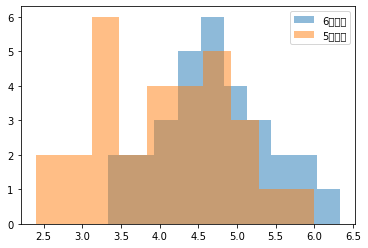

In [126]:
plt.hist(mean_6["degrees"], label="6ノード", alpha=0.5)
plt.hist(mean_5["degrees"], label="5ノード",alpha=0.5)
plt.legend()
#plt.savefig("small/cluster.jpg") 

/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12494 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12

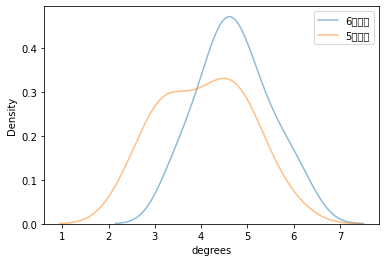

In [128]:
sns.kdeplot(mean_6["degrees"], label="6ノード", alpha=0.5)
sns.kdeplot(mean_5["degrees"], label="5ノード",alpha=0.5)
plt.legend()

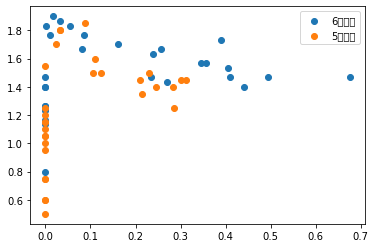

In [49]:
plt.scatter(mean_6["phi"], mean_6["L"], label="6ノード")
plt.scatter(mean_5["phi"], mean_5["L"], label="5ノード")
plt.legend()
plt.savefig("small/L.jpg") 

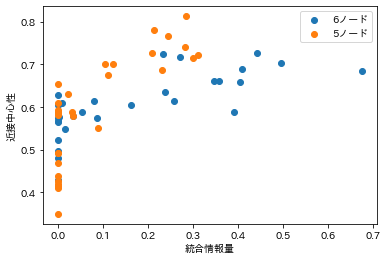

In [49]:
plt.scatter(mean_6["phi"], mean_6["close_centers"], label="6ノード")
plt.scatter(mean_5["phi"], mean_5["close_centers"], label="5ノード")
plt.xlabel("統合情報量")
plt.ylabel("近接中心性")
plt.legend()
plt.savefig("small/phi-close.jpg") 

In [52]:
mean_6.head()

,phi,num_edge,mean_degrees,degree_centers,close_centers,degrees,eigen_centers,between_centers,cluster,dc_std,dc_var,L
0,0.345502,15,5.000000,1.000000,0.661075,5.000000,0.389311,0.141667,0.557212,0.282843,0.080000,1.566667
1,0.000000,14,4.666667,0.933333,0.568148,4.666667,0.394798,0.108333,0.561457,0.301109,0.090667,1.266667
2,0.494857,17,5.666667,1.133333,0.703373,5.666667,0.391447,0.116667,0.643228,0.326599,0.106667,1.466667
3,0.000000,14,4.666667,0.933333,0.564484,4.666667,0.353355,0.108333,0.424166,0.242212,0.058667,1.266667
4,0.000000,10,3.333333,0.666667,0.430093,3.333333,0.284518,0.058333,0.323099,0.372380,0.138667,0.800000


In [38]:
cm5

array([[0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0]])

In [12]:
cm6 = np.array([0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0])
cm6 = cm6.reshape(6,6)

In [13]:
cm5 = np.array([0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0])
cm5 = cm5.reshape(5,5)

In [13]:
cm6

array([[0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0]])

In [39]:
edge5 = []

In [40]:
for col in range(len(nodes)):
            for row in range(len(nodes)):
                if cm5[col][row] == 1:
                    edge5.append((nodes[col],nodes[row]))


In [41]:
edge5

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('B', 'A'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'D'),
 ('C', 'E'),
 ('D', 'A'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'E'),
 ('E', 'A'),
 ('E', 'B'),
 ('E', 'C'),
 ('E', 'D')]

In [15]:
states = np.zeros((pow(2, len(nodes)),len(nodes)), dtype=int)
for i in range(pow(2, len(nodes))):
    for j in range(1, len(bin(i))-1):
        states[i][j-1] = bin(i)[j * (-1)]

In [19]:
states

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
 

In [16]:
tpm = np.dot(states, cm5)  
s = np.sum(tpm, axis=1)
a = []
for j in range(tpm.shape[0] ):
    if s[j] != 0:
        a.append((tpm[j] / s[j]))
    else:
        a.append(tpm[j])
s_tpm = np.array(a)

In [29]:
network = pyphi.Network(s_tpm, cm=cm5, node_labels=nodes)
phis = {}
p5 = []
success_dic = {}
success_list = []

In [30]:
for j in range(pow(2, len(nodes))):
        init_state = states[j]
        try:
            print(j, "states")
            subsystem = pyphi.Subsystem(network, init_state)
            p5.append(pyphi.compute.phi(subsystem))
            #セイリツシタトキノstate
            success_list.append(j)
            
        except:
            
            pass

0 states


1 states


2 states


Computing concepts:   0%|          | 0/31 [00:00<?, ?it/s]Process Process-272:
Process Process-271:
Process Process-269:
Traceback (most recent call last):
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/pyphi/compute/parallel.py", line 175, in worker
    result_queue.put(compute(obj, *context))
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 189, in compute
    return evaluate_cut(subsystem, cut, unpartitioned_ces)
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 158, in evaluate_cut
    pa

  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 189, in compute
    return evaluate_cut(subsystem, cut, unpartitioned_ces)
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/pyphi/compute/subsystem.py", line 162, in evaluate_cut
    phi_ = ces_distance(unpartitioned_ces, partitioned_ces)
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/pyphi/compute/distance.py", line 147, in ces_distance
    dist = _ces_distance_emd(concepts_only_in_C1, concepts_only_in_C2)
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/pyphi/compute/distance.py", line 62, in _ces_distance_emd
    [[concept_distance(i, j) for j in unique_C2] for i in unique_C1]
  File "/Users/ohmigawakouhei/Applications/anaconda3/envs/lab/lib/python3.6/site-packages/pyphi/compute/distance.py", line 62, in <listcomp>
    [[concept_distance(

3 states


4 states


5 states


6 states


7 states


8 states


9 states


10 states


11 states


12 states


13 states


14 states


15 states


16 states


17 states


18 states


19 states


20 states


21 states


22 states


23 states


24 states


25 states


26 states


27 states


28 states


29 states


30 states


31 states


In [28]:
p5 = phi

In [31]:
p5

[0.288901,
 0.058998,
 0.052389,
 0.058998,
 0.052389,
 0.052389,
 0.05999,
 0.058752,
 0.052389,
 0.052389,
 0.05999,
 0.052389,
 0.05999,
 0.05999,
 0.078469,
 0.058178,
 0.052389,
 0.052389,
 0.060825,
 0.052389,
 0.060825,
 0.060825,
 0.078469,
 0.052389,
 0.061674,
 0.061674,
 0.078469,
 0.063215,
 0.078469,
 0.078593,
 0.129004]

In [50]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edge5)

degrees = dict(nx.degree(G))
degree_centers = nx.degree_centrality(G)
close_centers = nx.closeness_centrality(G)
between_centers = nx.betweenness_centrality(G)
eigen_centers = nx.eigenvector_centrality_numpy(G)
cluster = nx.clustering(G)
mean_c = nx.algorithms.cluster.average_clustering(G)
mean_l = average_shortest_path_length(G)
mean_cluster.append(mean_c)
mean_short_path_length.append(mean_l)


sum_between_centers.append(sum(between_centers.values()))
sum_degree_centers.append(sum(degree_centers.values()))
sum_close_centers.append(sum(close_centers.values()))
sum_degrees.append(sum(degrees.values()))
sum_eigen_centers.append(sum(eigen_centers.values()))
sum_cluster.append(sum(cluster.values()))

max_degrees.append(max(degrees.values()))
max_degree_centers.append(max(degree_centers.values()))
max_close_centers.append(max(close_centers.values()))
max_eigen_centers.append(max(eigen_centers.values()))
max_between_centers.append(max(between_centers.values()))
max_cluster.append(max(cluster.values()))
    
degree_centers_std.append(dc_std)
degree_centers_variance.append(dc_var)
    
num_edges.append(len(edges[i]))

In [52]:
mean_between_centers = [x/n for x in sum_between_centers]
mean_degree_centers = [x/n for x in sum_degree_centers]
mean_close_centers = [x/n for x in sum_close_centers]
mean_degrees = [x/n for x in sum_degrees]
mean_eigen_centers = [x/n for x in sum_eigen_centers]
mean_cluster = [x/n for x in sum_cluster]

In [72]:
cluster5 = mean_cluster
dc5 = mean_degree_centers 
gamma5 = gamma
lambda5 = s_lambda

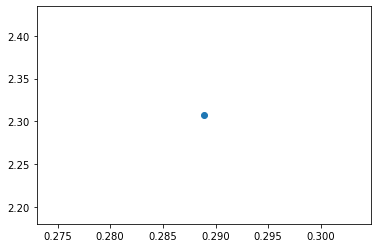

In [94]:
plt.scatter(max(p5), gamma5)

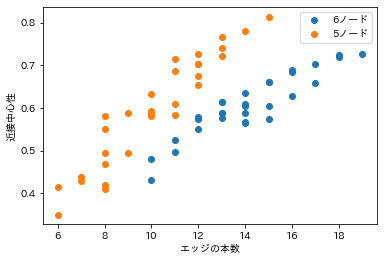

In [46]:
plt.scatter(mean_6["num_edge"], mean_6["close_centers"], label="6ノード")
plt.scatter(mean_5["num_edge"], mean_5["close_centers"], label="5ノード")
plt.xlabel("エッジの本数")
plt.ylabel("近接中心性")
plt.legend()
plt.savefig("small/edge-close.jpg") 

In [40]:
k, l = spearmanr(mean_5["num_edge"].values, mean_5["close_centers"].values)
print("r:",k)
print("p:",l)

r: 0.9509767887654967
p: 8.393626339706349e-16


In [42]:
r, p = spearmanr(mean_6["num_edge"].values, mean_6["close_centers"].values)
print("r:",r)
print("p:",p)

r: 0.8606686390435334
p: 1.0635621172636437e-09


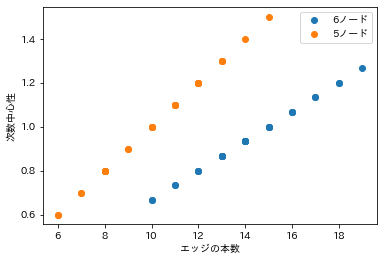

In [45]:
plt.scatter(mean_6["num_edge"], mean_6["degree_centers"], label="6ノード")
plt.scatter(mean_5["num_edge"], mean_5["degree_centers"], label="5ノード")
plt.xlabel("エッジの本数")
plt.ylabel("次数中心性")
plt.legend()
plt.savefig("small/edge-degree.jpg") 

In [43]:
r, p = spearmanr(mean_5["num_edge"].values, mean_5["degree_centers"].values)
print("r:",r)
print("p:",p)

r: 1.0
p: 0.0


In [44]:
r, p = spearmanr(mean_6["num_edge"].values, mean_6["degree_centers"].values)
print("r:",r)
print("p:",p)

r: 0.9950572602332919
p: 1.234285564689429e-29


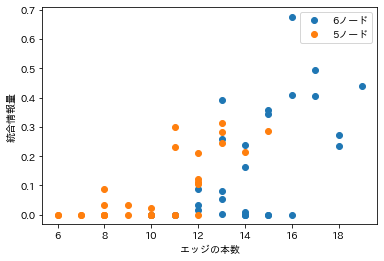

In [48]:
plt.scatter(mean_6["num_edge"], mean_6["phi"], label="6ノード")
plt.scatter(mean_5["num_edge"], mean_5["phi"], label="5ノード")
plt.xlabel("エッジの本数")
plt.ylabel("統合情報量")
plt.legend()
plt.savefig("small/edge-phi.jpg") 

In [52]:
r, p = spearmanr(mean_6["num_edge"].values, mean_6["phi"].values)
print("r:",r)
print("p:",p)

r: 0.5383217050222283
p: 0.00215008376130354


In [53]:
r, p = spearmanr(mean_5["num_edge"].values, mean_5["phi"].values)
print("r:",r)
print("p:",p)

r: 0.7158366356562548
p: 8.697727559329318e-06
